<a href="https://colab.research.google.com/github/david-j-cox/Man-vs-Machine/blob/master/Nashville_EDA_GME_Fits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Packages!!
import os
import sys
import pandas as pd
import numpy as np
import scipy
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')
%cd './gdrive/My Drive/Policing Data'
%matplotlib inline

Mounted at /content/gdrive
/content/gdrive/My Drive/Policing Data


In [3]:
# Read in the data
nash_raw_data = pd.read_csv("tn_nashville_2020_04_01.csv")
nash_data = nash_raw_data.copy()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,9,16,17,18,23,24,25,26,30,31,32,33,34,36,37,38,39,41,42) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# Sample of what the data looks like and the data types
print(nash_data.dtypes)
nash_data.head()

raw_row_number                     object
date                               object
time                               object
location                           object
lat                               float64
lng                               float64
precinct                           object
reporting_area                    float64
zone                               object
subject_age                       float64
subject_race                       object
subject_sex                        object
officer_id_hash                    object
type                               object
violation                          object
arrest_made                        object
citation_issued                    object
warning_issued                     object
outcome                            object
contraband_found                   object
contraband_drugs                   object
contraband_weapons                 object
frisk_performed                    object
search_conducted                  

,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,subject_age,subject_race,subject_sex,officer_id_hash,type,violation,arrest_made,citation_issued,warning_issued,outcome,contraband_found,contraband_drugs,contraband_weapons,frisk_performed,search_conducted,search_person,search_vehicle,search_basis,reason_for_stop,vehicle_registration_state,notes,raw_verbal_warning_issued,raw_written_warning_issued,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
0,232947,2010-10-10,NaN,"DOMINICAN DR & ROSA L PARKS BLVD, NASHVILLE, T...",36.187925,-86.798519,6,4403.0,611,27.0,black,male,80ed1b32eb,vehicular,investigative stop,False,False,True,warning,NaN,NaN,NaN,False,False,False,False,NaN,investigative stop,TN,NaN,True,False,False,NaN,N,False,False,False,False,False,False,False
1,237161,2010-10-10,10:00:00,"1122 LEBANON PIKE, NASHVILLE, TN, 37210",36.155521,-86.735902,5,9035.0,513,18.0,white,male,a983204b21,vehicular,moving traffic violation,False,True,False,citation,NaN,NaN,NaN,False,False,False,False,NaN,moving traffic violation,TN,NaN,False,False,True,NaN,N,False,False,False,False,False,False,False
2,232902,2010-10-10,10:00:00,"898 DAVIDSON DR, , TN, 37205",36.117420,-86.895593,1,5005.0,121,52.0,white,male,f5d8fbd78b,vehicular,vehicle equipment violation,False,False,True,warning,NaN,NaN,NaN,False,False,False,False,NaN,vehicle equipment violation,TN,NaN,True,False,False,NaN,N,False,False,False,False,False,False,False
3,233219,2010-10-10,22:00:00,"MURFREESBORO PIKE & NASHBORO BLVD, ANTIOCH, TN...",36.086799,-86.648581,3,8891.0,325,25.0,white,male,4f1d028e45,vehicular,registration,False,False,True,warning,NaN,NaN,NaN,False,False,False,False,NaN,registration,TN,NaN,True,False,False,NaN,N,False,False,False,False,False,False,False
4,232780,2010-10-10,01:00:00,"BUCHANAN ST, NORTH, TN, 37208",36.180038,-86.809109,NaN,NaN,NaN,21.0,black,male,0f0e6b7d67,vehicular,vehicle equipment violation,False,False,True,warning,False,False,False,False,True,True,True,probable cause,vehicle equipment violation,TN,NaN,True,False,False,NaN,N,True,True,False,False,False,False,False


# Basic comparisons of stops, frisks, searches, contraband found, and arrests by race. 

<function matplotlib.pyplot.show>

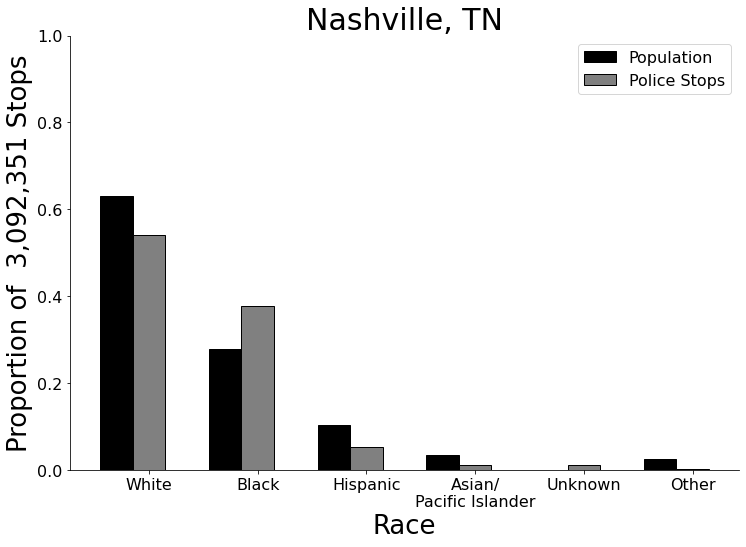

In [4]:
#### Comparison of stops by race and demographics
# Create demographic list
demog_2018 = [0.6316, 0.2788, 0.1040, 0.0362, 0.00, 0.0253]

# Stops by race df
stops_by_race = nash_data.subject_race.value_counts()
stops_by_race = stops_by_race / len(nash_data)

# Characteristics of the plot
fig, ax = plt.subplots(figsize=(12, 8))
barWidth = 0.3 # barwidth
r1 = np.arange(len(demog_2018)) # x position of bars
r2 = [x + barWidth for x in r1] # x position of bars
plt.bar(r1, demog_2018, width=barWidth, color='black', edgecolor='black', label='Population') # Create black bars
plt.bar(r2, stops_by_race, width=barWidth, color='gray', edgecolor='black', label='Police Stops') # Create gray bars

# General layout
plt.xticks([r + barWidth for r in range(len(demog_2018))], \
           ['White', 'Black', 'Hispanic', 'Asian/\nPacific Islander', 'Unknown', 'Other'], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,1)
plt.ylabel('Proportion of  %s Stops' %'{:,}'.format(len(nash_data)), fontsize=26)
plt.xlabel('Race', fontsize=26)
plt.legend(prop={'size':16})
plt.title("Nashville, TN", fontsize=30)

# Remove top and right spines
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)

plt.show # show graphic

<function matplotlib.pyplot.show>

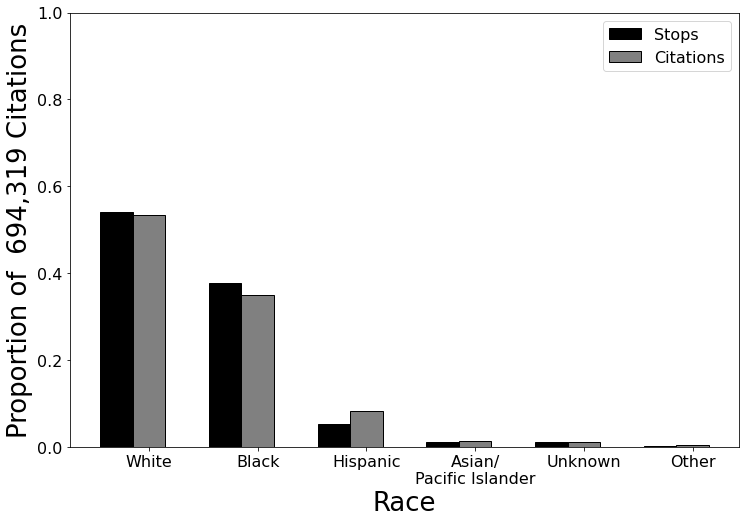

In [5]:
#### Comparison of citations by race once pulled over
# Stops by race df
stops_by_race = nash_data.subject_race.value_counts()
stops_by_race = stops_by_race / len(nash_data)

# Citations by race
citation_data = nash_data.loc[nash_data['citation_issued']==True]
citation_by_race = citation_data.subject_race.value_counts()
citation_by_race = citation_by_race / len(citation_data)

# Characteristics of the plot
plt.figure(figsize=(12, 8))
barWidth = 0.3 # barwidth
r1 = np.arange(len(demog_2018)) # x position of bars
r2 = [x + barWidth for x in r1] # x position of bars
plt.bar(r1, stops_by_race, width=barWidth, color='black', edgecolor='black', label='Stops') # Create black bars
plt.bar(r2, citation_by_race, width=barWidth, color='gray', edgecolor='black', label='Citations') # Create gray bars

# General layout
plt.xticks([r + barWidth for r in range(len(stops_by_race))], \
           ['White', 'Black', 'Hispanic', 'Asian/\nPacific Islander', 'Unknown', 'Other'], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,1)
plt.ylabel('Proportion of  %s Citations' %'{:,}'.format(len(citation_data)), fontsize=26)
plt.xlabel('Race', fontsize=26)
plt.legend(prop={'size':16})

plt.show # show graphic

<function matplotlib.pyplot.show>

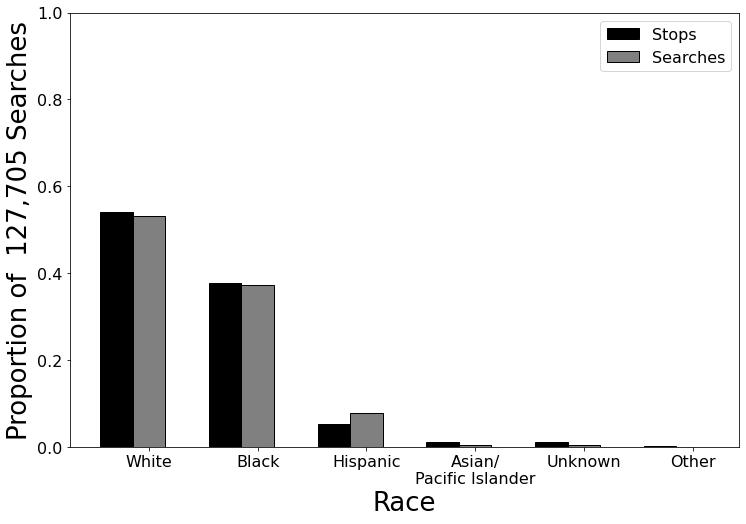

In [6]:
#### Comparison of        es by race once pulled over
# Stops by race df
stops_by_race = nash_data.subject_race.value_counts()
stops_by_race = stops_by_race / len(nash_data)

# Searches by race
search_data = nash_data.loc[nash_data['search_conducted']==True]
search_by_race = search_data.subject_race.value_counts()
search_by_race = search_by_race / len(search_data)

# Characteristics of the plot
plt.figure(figsize=(12, 8))
barWidth = 0.3 # barwidth
r1 = np.arange(len(demog_2018)) # x position of bars
r2 = [x + barWidth for x in r1] # x position of bars
plt.bar(r1, stops_by_race, width=barWidth, color='black', edgecolor='black', label='Stops') # Create black bars
plt.bar(r2, search_by_race, width=barWidth, color='gray', edgecolor='black', label='Searches') # Create gray bars

# General layout
plt.xticks([r + barWidth for r in range(len(search_by_race))], \
           ['White', 'Black', 'Hispanic', 'Asian/\nPacific Islander', 'Unknown', 'Other'], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,1)
plt.ylabel('Proportion of  %s Searches' %'{:,}'.format(len(search_data)), fontsize=26)
plt.xlabel('Race', fontsize=26)
plt.legend(prop={'size':16})

plt.show # show graphic

<function matplotlib.pyplot.show>

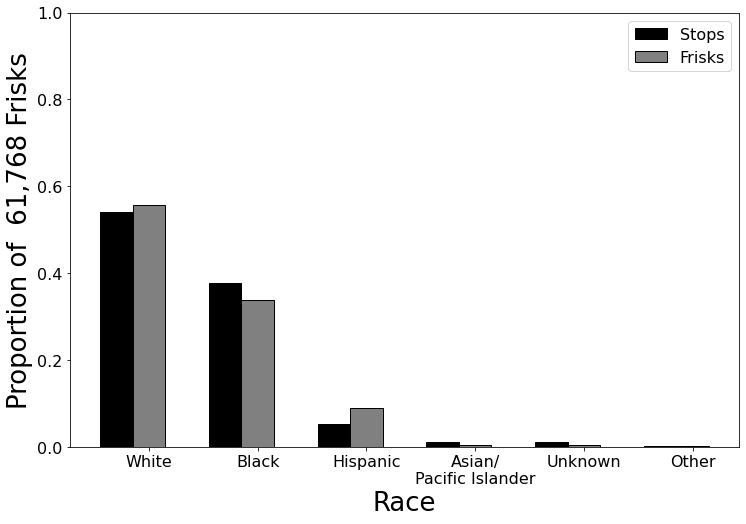

In [7]:
#### Comparison of frisks by race once pulled over
# Stops by race df
stops_by_race = nash_data.subject_race.value_counts()
stops_by_race = stops_by_race / len(nash_data)

# Frisks by race
frisk_data = nash_data.loc[nash_data['frisk_performed']==True]
frisk_by_race = frisk_data.subject_race.value_counts()
frisk_by_race = frisk_by_race / len(frisk_data)

# Characteristics of the plot
plt.figure(figsize=(12, 8))
barWidth = 0.3 # barwidth
r1 = np.arange(len(demog_2018)) # x position of bars
r2 = [x + barWidth for x in r1] # x position of bars
plt.bar(r1, stops_by_race, width=barWidth, color='black', edgecolor='black', label='Stops') # Create black bars
plt.bar(r2, frisk_by_race, width=barWidth, color='gray', edgecolor='black', label='Frisks') # Create gray bars

# General layout
plt.xticks([r + barWidth for r in range(len(frisk_by_race))], \
           ['White', 'Black', 'Hispanic', 'Asian/\nPacific Islander', 'Unknown', 'Other'], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,1)
plt.ylabel('Proportion of  %s Frisks' %'{:,}'.format(len(frisk_data)), fontsize=26)
plt.xlabel('Race', fontsize=26)
plt.legend(prop={'size':16})

plt.show # show graphic

<function matplotlib.pyplot.show>

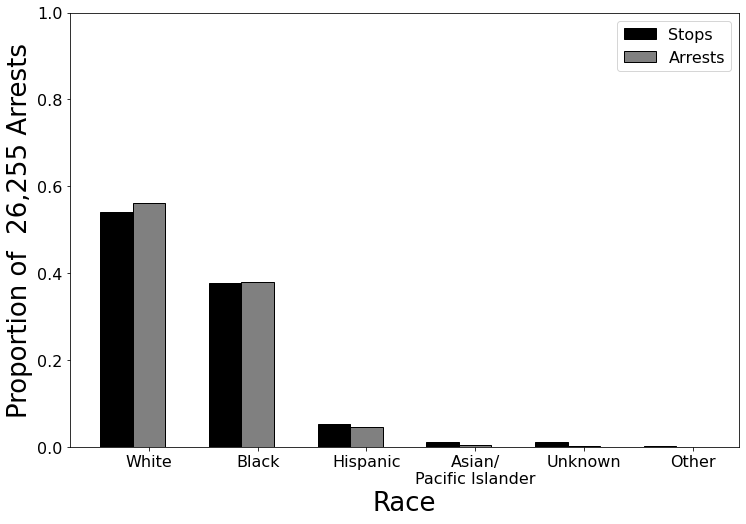

In [8]:
#### Comparison of contraband_found by race once pulled over
# Stops by race df
stops_by_race = nash_data.subject_race.value_counts()
stops_by_race = stops_by_race / len(nash_data)

# Contraband FOund by race
arrest_data = nash_data.loc[nash_data['contraband_found']==True]
arrest_by_race = arrest_data.subject_race.value_counts()
arrest_by_race = arrest_by_race / len(arrest_data)

# Characteristics of the plot
plt.figure(figsize=(12, 8))
barWidth = 0.3 # barwidth
r1 = np.arange(len(demog_2018)) # x position of bars
r2 = [x + barWidth for x in r1] # x position of bars
plt.bar(r1, stops_by_race, width=barWidth, color='black', edgecolor='black', label='Stops') # Create black bars
plt.bar(r2, arrest_by_race, width=barWidth, color='gray', edgecolor='black', label='Arrests') # Create gray bars

# General layout
plt.xticks([r + barWidth for r in range(len(arrest_by_race))], \
           ['White', 'Black', 'Hispanic', 'Asian/\nPacific Islander', 'Unknown', 'Other'], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,1)
plt.ylabel('Proportion of  %s Arrests' %'{:,}'.format(len(arrest_data)), fontsize=26)
plt.xlabel('Race', fontsize=26)
plt.legend(prop={'size':16})

plt.show # show graphic

<function matplotlib.pyplot.show>

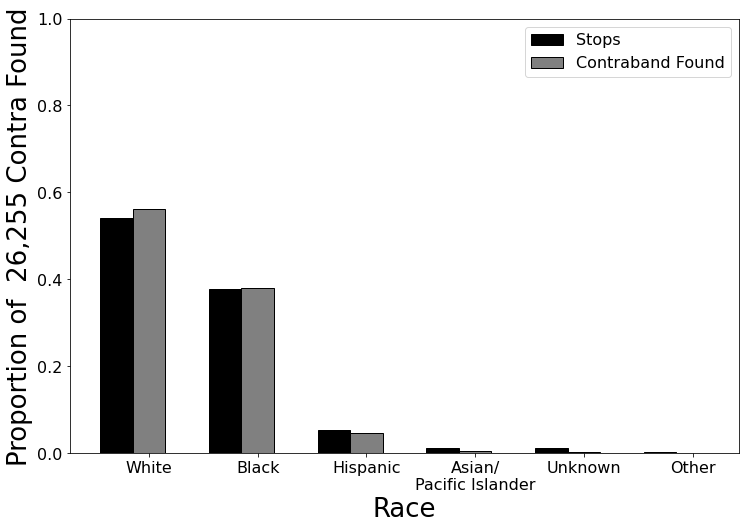

In [9]:
#### Comparison of contraband found by race once pulled over
# Stops by race df
stops_by_race = nash_data.subject_race.value_counts()
stops_by_race = stops_by_race / len(nash_data)

# Contraband found by race
contra_data = nash_data.loc[nash_data['contraband_found']==True]
contra_by_race = contra_data.subject_race.value_counts()
contra_by_race = contra_by_race / len(contra_data)

# Characteristics of the plot
plt.figure(figsize=(12, 8))
barWidth = 0.3 # barwidth
r1 = np.arange(len(demog_2018)) # x position of bars
r2 = [x + barWidth for x in r1] # x position of bars
plt.bar(r1, stops_by_race, width=barWidth, color='black', edgecolor='black', label='Stops') # Create black bars
plt.bar(r2, contra_by_race, width=barWidth, color='gray', edgecolor='black', label='Contraband Found') # Create gray bars

# General layout
plt.xticks([r + barWidth for r in range(len(contra_by_race))], \
           ['White', 'Black', 'Hispanic', 'Asian/\nPacific Islander', 'Unknown', 'Other'], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,1)
plt.ylabel('Proportion of  %s Contra Found' %'{:,}'.format(len(contra_data)), fontsize=26)
plt.xlabel('Race', fontsize=26)
plt.legend(prop={'size':16})

plt.show # show graphic

# Re-run the the same analyses but also separated by day and night. 

In [10]:
# Average sunrise time is 6:35 AM and sunset is 7:05 PM in Nashville
# Cut the data into two dataframes for day and night. 
import datetime
nash_data['time'] = pd.to_datetime(nash_data['time'])
nash_data = nash_data[nash_data['subject_race'].notna()]
nash_day = nash_data[(nash_data["time"].apply(lambda x : x.hour)>6) & (nash_data["time"].apply(lambda x : x.hour)<19)]
nash_day_indices = nash_day.index.values
nash_night = nash_data.drop(nash_day_indices)
nash_night = nash_night[nash_night['time'].notna()]

<function matplotlib.pyplot.show>

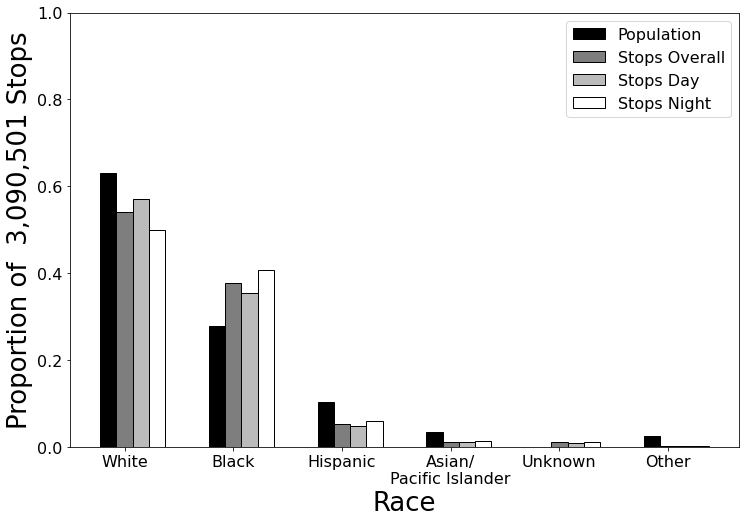

In [11]:
#### Comparison of stops by race and demographics
# Create demographic list
demog_2018 = [0.6316, 0.2788, 0.1040, 0.0362, 0.00, 0.0253]

# Stops by race df
stops_by_race = nash_data.subject_race.value_counts()
stops_by_race = stops_by_race / len(nash_data)

# Stops by race during the day
stops_race_day = nash_day.subject_race.value_counts()
stops_race_day = stops_race_day / len(nash_day)

# Stops by race during the night
stops_race_night = nash_night.subject_race.value_counts()
stops_race_night = stops_race_night / len(nash_night)

# Characteristics of the plot
plt.figure(figsize=(12, 8))
barWidth = 0.15 # barwidth
r1 = np.arange(len(demog_2018)) # x position of bars
r2 = [x + barWidth for x in r1] # x position of bars
r3 = [x + barWidth for x in r2] # x position of bars
r4 = [x + barWidth for x in r3] # x position of bars

plt.bar(r1, demog_2018, width=barWidth, color='#000000', edgecolor='black', label='Population') # Create black bars
plt.bar(r2, stops_by_race, width=barWidth, color='#7E7E7E', edgecolor='black', label='Stops Overall') # Create dark grey bars
plt.bar(r3, stops_race_day, width=barWidth, color='#BBBBBB', edgecolor='black', label='Stops Day') # Create light grey bars
plt.bar(r4, stops_race_night, width=barWidth, color='#FFFFFF', edgecolor='black', label='Stops Night') # Create white bars


# General layout
plt.xticks([r + barWidth for r in range(len(demog_2018))], \
           ['White', 'Black', 'Hispanic', 'Asian/\nPacific Islander', 'Unknown', 'Other'], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,1)
plt.ylabel('Proportion of  %s Stops' %'{:,}'.format(len(nash_data)), fontsize=26)
plt.xlabel('Race', fontsize=26)
plt.legend(prop={'size':16})

plt.show # show graphic

<function matplotlib.pyplot.show>

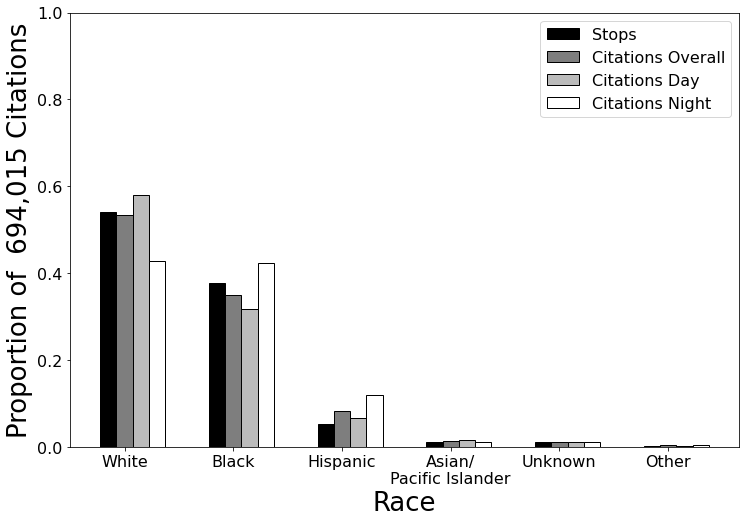

In [12]:
# Re-run the same analyses for the different data_frames
#### Comparison of stops by race and demographics
# Stops by race df
stops_by_race = nash_data.subject_race.value_counts()
stops_by_race = stops_by_race / len(nash_data)

# Citations by race
citation_data = nash_data.loc[nash_data['citation_issued']==True]
citation_by_race = citation_data.subject_race.value_counts()
citation_by_race = citation_by_race / len(citation_data)

# Stops by race during the day
citation_data_day = nash_day.loc[nash_day['citation_issued']==True]
citations_race_day = citation_data_day.subject_race.value_counts()
citations_race_day = citations_race_day / len(citation_data_day)

# Stops by race during the night
citation_data_night = nash_night.loc[nash_night['citation_issued']==True]
citations_race_night = citation_data_night.subject_race.value_counts()
citations_race_night = citations_race_night / len(citation_data_night)

# Characteristics of the plot
plt.figure(figsize=(12, 8))
barWidth = 0.15 # barwidth
r1 = np.arange(len(demog_2018)) # x position of bars
r2 = [x + barWidth for x in r1] # x position of bars
r3 = [x + barWidth for x in r2] # x position of bars
r4 = [x + barWidth for x in r3] # x position of bars

plt.bar(r1, stops_by_race, width=barWidth, color='#000000', edgecolor='black', label='Stops') # Create black bars
plt.bar(r2, citation_by_race, width=barWidth, color='#7E7E7E', edgecolor='black', label='Citations Overall') # Create dark grey bars
plt.bar(r3, citations_race_day, width=barWidth, color='#BBBBBB', edgecolor='black', label='Citations Day') # Create light grey bars
plt.bar(r4, citations_race_night, width=barWidth, color='#FFFFFF', edgecolor='black', label='Citations Night') # Create white bars


# General layout
plt.xticks([r + barWidth for r in range(len(demog_2018))], \
           ['White', 'Black', 'Hispanic', 'Asian/\nPacific Islander', 'Unknown', 'Other'], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,1)
plt.ylabel('Proportion of  %s Citations' %'{:,}'.format(len(citation_data)), fontsize=26)
plt.xlabel('Race', fontsize=26)
plt.legend(prop={'size':16})

plt.show # show graphic

<function matplotlib.pyplot.show>

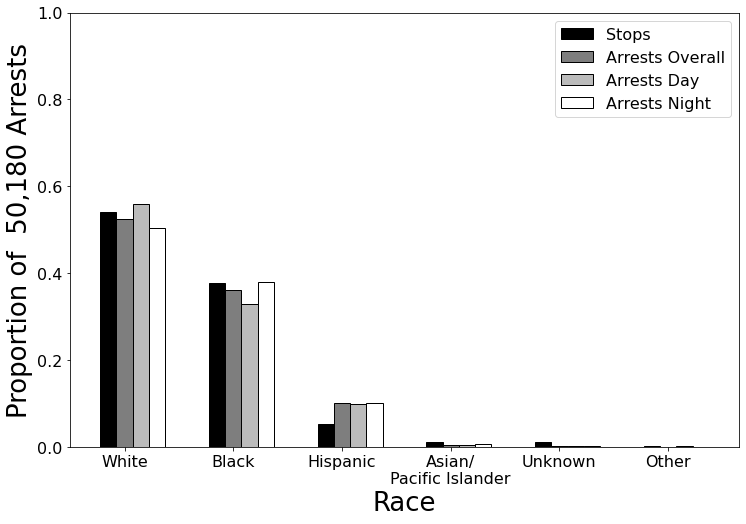

In [13]:
# Re-run the same analyses for the different data_frames
#### Comparison of stops by race and demographics
# Stops by race df
stops_by_race = nash_data.subject_race.value_counts()
stops_by_race = stops_by_race / len(nash_data)

# Citations by race
arrest_data = nash_data.loc[nash_data['arrest_made']==True]
arrest_by_race = arrest_data.subject_race.value_counts()
arrest_by_race = arrest_by_race / len(arrest_data)

# Stops by race during the day
arrest_data_day = nash_day.loc[nash_day['arrest_made']==True]
arrest_race_day = arrest_data_day.subject_race.value_counts()
arrest_race_day = arrest_race_day / len(arrest_data_day)

# Stops by race during the night
arrest_data_night = nash_night.loc[nash_night['arrest_made']==True]
arrest_race_night = arrest_data_night.subject_race.value_counts()
arrest_race_night = arrest_race_night / len(arrest_data_night)

# Characteristics of the plot
plt.figure(figsize=(12, 8))
barWidth = 0.15 # barwidth
r1 = np.arange(len(demog_2018)) # x position of bars
r2 = [x + barWidth for x in r1] # x position of bars
r3 = [x + barWidth for x in r2] # x position of bars
r4 = [x + barWidth for x in r3] # x position of bars

plt.bar(r1, stops_by_race, width=barWidth, color='#000000', edgecolor='black', label='Stops') # Create black bars
plt.bar(r2, arrest_by_race, width=barWidth, color='#7E7E7E', edgecolor='black', label='Arrests Overall') # Create dark grey bars
plt.bar(r3, arrest_race_day, width=barWidth, color='#BBBBBB', edgecolor='black', label='Arrests Day') # Create light grey bars
plt.bar(r4, arrest_race_night, width=barWidth, color='#FFFFFF', edgecolor='black', label='Arrests Night') # Create white bars


# General layout
plt.xticks([r + barWidth for r in range(len(demog_2018))], \
           ['White', 'Black', 'Hispanic', 'Asian/\nPacific Islander', 'Unknown', 'Other'], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,1)
plt.ylabel('Proportion of  %s Arrests' %'{:,}'.format(len(arrest_data)), fontsize=26)
plt.xlabel('Race', fontsize=26)
plt.legend(prop={'size':16})

plt.show # show graphic

<function matplotlib.pyplot.show>

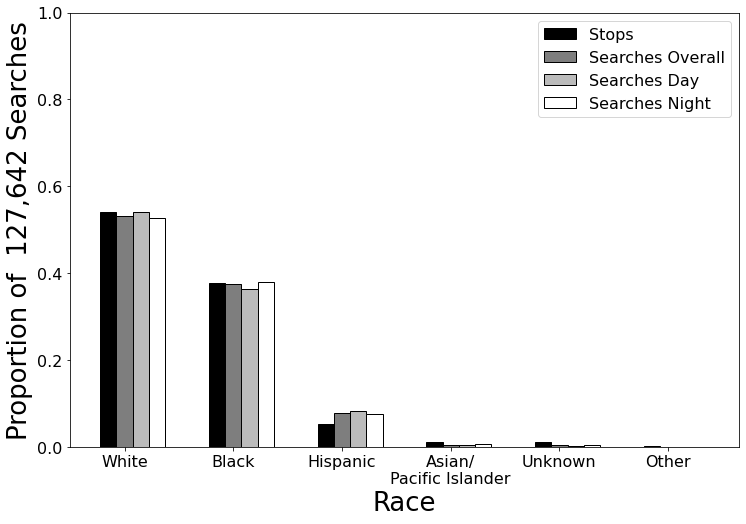

In [14]:
# Re-run the same analyses for the different data_frames
#### Comparison of searches by race and demographics
# Stops by race df
stops_by_race = nash_data.subject_race.value_counts()
stops_by_race = stops_by_race / len(nash_data)

# Searches by race
search_data = nash_data.loc[nash_data['search_conducted']==True]
search_by_race = search_data.subject_race.value_counts()
search_by_race = search_by_race / len(search_data)

# Searches by race during the day
search_data_day = nash_day.loc[nash_day['search_conducted']==True]
search_race_day = search_data_day.subject_race.value_counts()
search_race_day = search_race_day / len(search_data_day)

# Searches by race during the night
search_data_night = nash_night.loc[nash_night['search_conducted']==True]
search_race_night = search_data_night.subject_race.value_counts()
search_race_night = search_race_night / len(search_data_night)

# Characteristics of the plot
plt.figure(figsize=(12, 8))
barWidth = 0.15 # barwidth
r1 = np.arange(len(demog_2018)) # x position of bars
r2 = [x + barWidth for x in r1] # x position of bars
r3 = [x + barWidth for x in r2] # x position of bars
r4 = [x + barWidth for x in r3] # x position of bars

plt.bar(r1, stops_by_race, width=barWidth, color='#000000', edgecolor='black', label='Stops') # Create black bars
plt.bar(r2, search_by_race, width=barWidth, color='#7E7E7E', edgecolor='black', label='Searches Overall') # Create dark grey bars
plt.bar(r3, search_race_day, width=barWidth, color='#BBBBBB', edgecolor='black', label='Searches Day') # Create light grey bars
plt.bar(r4, search_race_night, width=barWidth, color='#FFFFFF', edgecolor='black', label='Searches Night') # Create white bars

# General layout
plt.xticks([r + barWidth for r in range(len(demog_2018))], \
           ['White', 'Black', 'Hispanic', 'Asian/\nPacific Islander', 'Unknown', 'Other'], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,1)
plt.ylabel('Proportion of  %s Searches' %'{:,}'.format(len(search_data)), fontsize=26)
plt.xlabel('Race', fontsize=26)
plt.legend(prop={'size':16})

plt.show # show graphic

<function matplotlib.pyplot.show>

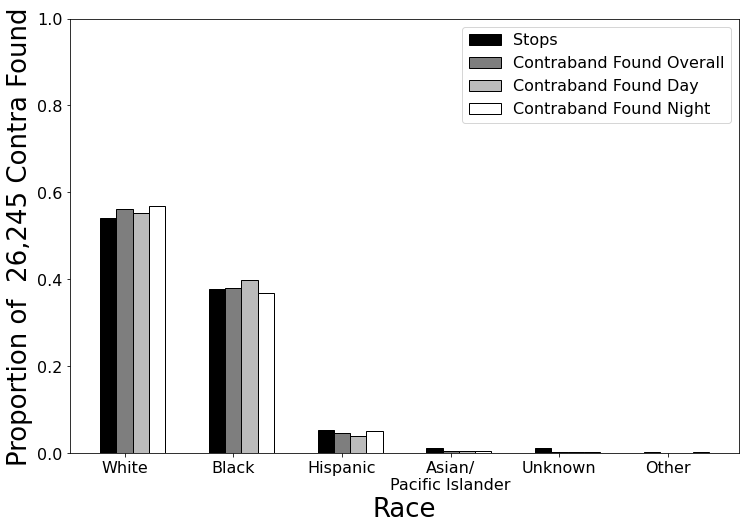

In [15]:
# Re-run the same analyses for the different data_frames
#### Comparison of Contraband Found by race and demographics
# Stops by race df
stops_by_race = nash_data.subject_race.value_counts()
stops_by_race = stops_by_race / len(nash_data)

# Contraband Found by race
contra_data = nash_data.loc[nash_data['contraband_found']==True]
contra_by_race = contra_data.subject_race.value_counts()
contra_by_race = contra_by_race / len(contra_data)

# Contraband Found by race during the day
contra_data_day = nash_day.loc[nash_day['contraband_found']==True]
contra_race_day = contra_data_day.subject_race.value_counts()
contra_race_day = contra_race_day / len(contra_data_day)

# Contraband Found by race during the night
contra_data_night = nash_night.loc[nash_night['contraband_found']==True]
contra_race_night = contra_data_night.subject_race.value_counts()
contra_race_night = contra_race_night / len(contra_data_night)

# Characteristics of the plot
plt.figure(figsize=(12, 8))
barWidth = 0.15 # barwidth
r1 = np.arange(len(demog_2018)) # x position of bars
r2 = [x + barWidth for x in r1] # x position of bars
r3 = [x + barWidth for x in r2] # x position of bars
r4 = [x + barWidth for x in r3] # x position of bars

plt.bar(r1, stops_by_race, width=barWidth, color='#000000', edgecolor='black', label='Stops') # Create black bars
plt.bar(r2, contra_by_race, width=barWidth, color='#7E7E7E', edgecolor='black', label='Contraband Found Overall') # Create dark grey bars
plt.bar(r3, contra_race_day, width=barWidth, color='#BBBBBB', edgecolor='black', label='Contraband Found Day') # Create light grey bars
plt.bar(r4, contra_race_night, width=barWidth, color='#FFFFFF', edgecolor='black', label='Contraband Found Night') # Create white bars

# General layout
plt.xticks([r + barWidth for r in range(len(demog_2018))], \
           ['White', 'Black', 'Hispanic', 'Asian/\nPacific Islander', 'Unknown', 'Other'], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,1)
plt.ylabel('Proportion of  %s Contra Found' %'{:,}'.format(len(contra_data)), fontsize=26)
plt.xlabel('Race', fontsize=26)
plt.legend(prop={'size':16})

plt.show # show graphic

<function matplotlib.pyplot.show>

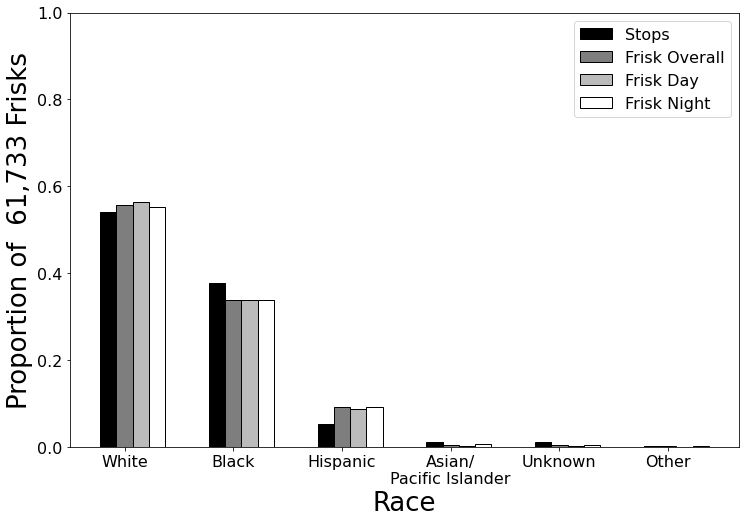

In [16]:
# Re-run the same analyses for the different data_frames
#### Comparison of Frisk by race and demographics
# Stops by race df
stops_by_race = nash_data.subject_race.value_counts()
stops_by_race = stops_by_race / len(nash_data)

# Frisk by race
frisk_data = nash_data.loc[nash_data['frisk_performed']==True]
frisk_by_race = frisk_data.subject_race.value_counts()
frisk_by_race = frisk_by_race / len(frisk_data)

# Frisk by race during the day
frisk_data_day = nash_day.loc[nash_day['frisk_performed']==True]
frisk_race_day = frisk_data_day.subject_race.value_counts()
frisk_race_day = frisk_race_day / len(frisk_data_day)

# Frisk by race during the night
frisk_data_night = nash_night.loc[nash_night['frisk_performed']==True]
frisk_race_night = frisk_data_night.subject_race.value_counts()
frisk_race_night = frisk_race_night / len(frisk_data_night)

# Characteristics of the plot
plt.figure(figsize=(12, 8))
barWidth = 0.15 # barwidth
r1 = np.arange(len(demog_2018)) # x position of bars
r2 = [x + barWidth for x in r1] # x position of bars
r3 = [x + barWidth for x in r2] # x position of bars
r4 = [x + barWidth for x in r3] # x position of bars

plt.bar(r1, stops_by_race, width=barWidth, color='#000000', edgecolor='black', label='Stops') # Create black bars
plt.bar(r2, frisk_by_race, width=barWidth, color='#7E7E7E', edgecolor='black', label='Frisk Overall') # Create dark grey bars
plt.bar(r3, frisk_race_day, width=barWidth, color='#BBBBBB', edgecolor='black', label='Frisk Day') # Create light grey bars
plt.bar(r4, frisk_race_night, width=barWidth, color='#FFFFFF', edgecolor='black', label='Frisk Night') # Create white bars

# General layout
plt.xticks([r + barWidth for r in range(len(demog_2018))], \
           ['White', 'Black', 'Hispanic', 'Asian/\nPacific Islander', 'Unknown', 'Other'], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,1)
plt.ylabel('Proportion of  %s Frisks' %'{:,}'.format(len(frisk_data)), fontsize=26)
plt.xlabel('Race', fontsize=26)
plt.legend(prop={'size':16})

plt.show # show graphic

# Combine all the proportion dataframes into single dataframe for further comparisons

In [17]:
data_tuples = list(zip(demog_2018, stops_by_race, stops_race_day, stops_race_night, \
                       search_by_race, search_race_day, search_race_night, \
                       frisk_by_race, frisk_race_day, frisk_race_night, \
                       citation_by_race, citations_race_day, citations_race_night, \
                       arrest_by_race, arrest_race_day, arrest_race_night, \
                       contra_by_race, contra_race_day, contra_race_night))
proportion_data = pd.DataFrame(data_tuples, columns=['Demographics', 'Stops_OVR', \
                                                     'Stops_Day', 'Stops_Night', \
                                                     'Search_OVR', 'Search_Day', 'Search_Night', \
                                                     'Frisk_OVR', 'Frisk_Day', 'Frisk_Night', \
                                                     'Cite_OVR', 'Cite_Day', 'Cite_Night', \
                                                     'Arrest_OVR', 'Arrest_Day', 'Arrest_Night', \
                                                     'Contra_OVR', 'Contra_Day', 'Contra_Night'])
proportion_data['Race'] = ['White', 'Black', 'Hispanic', 'Asian Pacific Islander', 'Unknown', 'Other']
proportion_data.set_index("Race", inplace=True)
proportion_data.head()

,Demographics,Stops_OVR,Stops_Day,Stops_Night,Search_OVR,Search_Day,Search_Night,Frisk_OVR,Frisk_Day,Frisk_Night,Cite_OVR,Cite_Day,Cite_Night,Arrest_OVR,Arrest_Day,Arrest_Night,Contra_OVR,Contra_Day,Contra_Night
Race,,,,,,,,,,,,,,,,,,,
White,0.6316,0.540648,0.571358,0.501049,0.532622,0.541215,0.527546,0.557109,0.564110,0.552802,0.534669,0.580450,0.428437,0.524611,0.559662,0.504491,0.562088,0.552218,0.567953
Black,0.2788,0.377243,0.354175,0.406988,0.374689,0.364781,0.380533,0.338539,0.337993,0.338744,0.349820,0.318130,0.423280,0.361419,0.329252,0.379813,0.379920,0.399269,0.368199
Hispanic,0.1040,0.053329,0.048397,0.059731,0.079637,0.083808,0.077199,0.091750,0.088394,0.093964,0.083926,0.068554,0.119669,0.102232,0.100708,0.103197,0.046904,0.039785,0.051287
Asian Pacific Islander,0.0362,0.013483,0.011912,0.015507,0.006526,0.004451,0.007760,0.005734,0.003970,0.006994,0.015374,0.016846,0.011971,0.005919,0.004448,0.006752,0.005487,0.004466,0.006127
Unknown,0.0000,0.011933,0.011253,0.012796,0.004622,0.004112,0.004915,0.004552,0.003759,0.004883,0.011591,0.011652,0.011462,0.003986,0.003844,0.004083,0.003696,0.002943,0.004167


In [ ]:
proportion_data.to_csv("All_Proportions.csv")

# Distributions of stops and putative reinforcers per month for all officiers

In [ ]:
target_plot = ['']

offcr_stops = nash_data.groupby(['year', 'month', 'officer_id_hash']).size()
sns.swarmplot(y=offcr_stops, color='k', alpha=0.8)

f, ax = plt.subplots(figsize=(15, 25))
sns.swarmplot(y=offcr_stops, color='k', alpha=0.8)
plt.xlabel('', fontsize=6, labelpad=(16))
plt.ylabel('Stops per Month', fontsize=26, labelpad=(16))
plt.yticks(fontsize=6)
plt.ylim(0, )
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
plt.show()

# Create year and month cols for grouping
nash_data['year'] = pd.DatetimeIndex(nash_data['date']).year
nash_data['month'] = pd.DatetimeIndex(nash_data['date']).month

# Calculate rate of stops per day and rate of citations per day
offcr_cites = nash_data.groupby(['year', 'month'])['citation_issued'].sum()
offcr_stops = nash_data.groupby(['year', 'month']).size()

cites_per_day = offcr_cites / 30.42
stops_per_day = offcr_stops / 30.42



# Define single-alternative matching equation

In [21]:
# Define single alternative matching equation and import packages we'll need to
# play with it.  
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

def single_match(x, k, re):
  return (k*x)/(x+re)

# Single-alt matching fit to group observations

In [22]:
# Lists for storing group fit vals
fit_type = []
reinforcer_type = []
k_val = []
re_val = []
r2_val = []

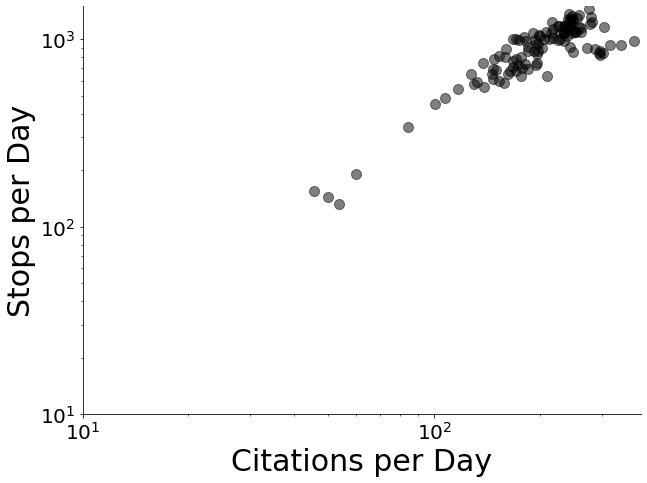

In [33]:
# CITATIONS AS ASSUMED REINFORCER

# Create year and month cols for grouping
nash_data['year'] = pd.DatetimeIndex(nash_data['date']).year
nash_data['month'] = pd.DatetimeIndex(nash_data['date']).month

# Calculate rate of stops per day and rate of citations per day
offcr_cites = nash_data.groupby(['year', 'month'])['citation_issued'].sum()
offcr_stops = nash_data.groupby(['year', 'month']).size()

cites_per_day = offcr_cites / 30.42
stops_per_day = offcr_stops / 30.42

# Fit the single-alt matching equation to the data
behavior = stops_per_day.values
reinforcer = cites_per_day.values
c, cov = curve_fit(single_match, reinforcer, behavior) # Fit model
preds_from_obs = single_match(reinforcer, *c)
r_2 = r2_score(behavior, preds_from_obs)

#Append vals to respective lists
fit_type.append('overall')
reinforcer_type.append('citations')
k_val.append(c[0])
re_val.append(c[1])
r2_val.append(round(r_2, 4))

# Create data for plotting the curve predicted by the single-alternative matching
cites_pred = np.linspace(0, cites_per_day.max(), 100)
stop_pred = []
for j in list(range(len(cites_pred))): # Predicted stops
  pred = round(single_match(cites_pred[j], c[0], c[1]), 4)
  stop_pred.append(pred)

# PLot behavior (stops) as a function of putative reinforcers (citations)
f, ax = plt.subplots(figsize=(10, 7.5))
plt.scatter(x=cites_per_day, y=stops_per_day, marker='o', alpha=0.5, \
            color='black', s=100)
#plt.plot(cites_pred, stop_pred, marker='', linestyle='-', color='black')
plt.xlabel('Citations per Day', fontsize=30)
plt.ylabel('Stops per Day', fontsize=30)
# plt.text(cites_per_day.max(), 0, '$R^2$=%s' %'{}'.format(round(r_2, 2)), \
#         fontsize=26, horizontalalignment='right')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(10, )
plt.ylim(10, 1500)
ax.set_xscale("log")
ax.set_yscale("log")
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
plt.savefig('Group_Fit_Citations.png')
plt.show()

In [ ]:
c, cov = curve_fit(single_match, cites_per_day, stops_per_day)
print(c)
print(cov)

[ 117.93810494 -112.20593282]
[[369.69626342   4.92672368]
 [  4.92672368   1.07020777]]


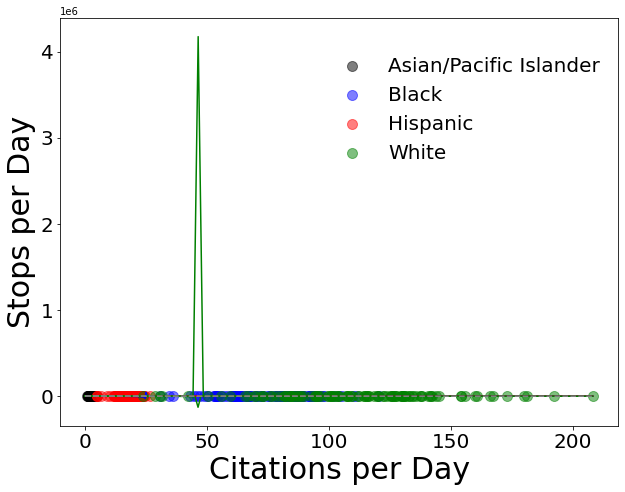

In [ ]:
# Run the same analysis, but grouped by race
# Calculate rate of stops per day and rate of citations per day
offcr_cites = nash_data.groupby(['year', 'month', 'subject_race'])['citation_issued'].sum().unstack()
offcr_stops = nash_data.groupby(['year', 'month', 'subject_race']).size().unstack()
cites_per_day = offcr_cites / 30.42
stops_per_day = offcr_stops / 30.42
cites_per_day = cites_per_day.fillna(0)
stops_per_day = stops_per_day.fillna(0)

# Loop through each race and fit the model
cols = list(cites_per_day)
race_plot = []
k_plot = []
re_plot = []
r2_plot = []

for k in cols:
  behavior = stops_per_day[k].values
  reinforcer = cites_per_day[k].values
  param_seeds = [16, 5]
  c, cov = curve_fit(single_match, reinforcer, behavior) # Fit model
  preds_from_obs = single_match(reinforcer, *c) # predictions for observed cites per month
  r_2 = r2_score(behavior, preds_from_obs) # calculate r^2 values

  # Append data to cols
  reinforcer_type.append('citations')
  fit_type.append(k)
  race_plot.append(k)
  k_val.append(c[0])
  k_plot.append(c[0])
  re_val.append(c[1])
  re_plot.append(c[1])
  r2_val.append(round(r_2, 4))
  r2_plot.append(round(r_2, 4))

# Combine race fits into single df for easier plotting by race
fits_by_race = pd.DataFrame({"est_k":k_plot, "est_re":re_plot, "r^2":r2_plot, "race":list(cites_per_day)})

# Create data for plotting the curve predicted by the single-alternative matching
cites_pred = np.linspace(0, cites_per_day.max(), 100)

# Predictions for Asian/Pacific Islander
api_pred = []
for m in list(range(len(cites_pred))):
  pred = single_match(cites_pred[m], fits_by_race['est_k'][0], fits_by_race['est_re'][0])
  api_pred.append(pred)

# Predictions for Black
black_pred = []
for m in list(range(len(cites_pred))):
  pred = single_match(cites_pred[m], fits_by_race['est_k'][1], fits_by_race['est_re'][1])
  black_pred.append(pred)

# Predictions for Hispanic
hispanic_pred = []
for m in list(range(len(cites_pred))):
  pred = single_match(cites_pred[m], fits_by_race['est_k'][2], fits_by_race['est_re'][2])
  hispanic_pred.append(pred)

# Predictions for White
white_pred = []
for m in list(range(len(cites_pred))):
  pred = single_match(cites_pred[m], fits_by_race['est_k'][5], fits_by_race['est_re'][5])
  white_pred.append(pred)

# PLot behavior (stops) as a function of putative reinforcers (citations)
plt.figure(figsize=(10, 7.5))

# Raw Data
plt.scatter(x=cites_per_day['asian/pacific islander'], y=stops_per_day['asian/pacific islander'], marker='o', alpha=0.5, \
            color='black', s=100, label='Asian/Pacific Islander')
plt.scatter(x=cites_per_day['black'], y=stops_per_day['black'], marker='o', alpha=0.5, \
            color='blue', s=100, label='Black')
plt.scatter(x=cites_per_day['hispanic'], y=stops_per_day['hispanic'], marker='o', alpha=0.5, \
            color='red', s=100, label='Hispanic')
plt.scatter(x=cites_per_day['white'], y=stops_per_day['white'], marker='o', alpha=0.5, \
            color='green', s=100, label='White')

# Prediction Curves
plt.plot(cites_pred, api_pred, marker='', linestyle='-', color='black')
plt.plot(cites_pred, black_pred, marker='', linestyle='-', color='blue')
plt.plot(cites_pred, hispanic_pred, marker='', linestyle='-', color='red')
plt.plot(cites_pred, white_pred, marker='', linestyle='-', color='green')
plt.plot(cites_pred, cites_pred, marker='', linestyle='--', color='gray')

# Details
plt.xlabel('Citations per Day', fontsize=30)
plt.ylabel('Stops per Day', fontsize=30)
plt.legend(fontsize=20, framealpha=0, bbox_to_anchor=(1, 0.95))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('Group_Fit_Citations_by_Race.png')
plt.show()

# Save data
All_Fits = pd.DataFrame({"reinforcer":reinforcer_type, "fit_type":fit_type, "est_k":k_val, "est_re":re_val, "r^2":r2_val})
All_Fits.to_csv('Group_Fit_Citations.csv')

# Single-alternative matching with citations as putative reinforcer and binned by month

In [ ]:
# Create list of all the unique officers in the dataset
uniq_offcrs = nash_data.officer_id_hash.unique()

In [ ]:
# Fit single alternative for all officers in the dataset with at least 12 observations
uniq_offcrs = nash_data.officer_id_hash.unique() # create the list of all officers we'll iterate through

# Lists for storing data
officer_num = []
fit_type = []
reinforcer_type = []
k_val = []
re_val = []
r2_val = []
error_officers = []

for i in uniq_offcrs[1865:]:
  # Isolate single officer
  offcr_hash = i
  offcr_A = nash_data[nash_data['officer_id_hash']==i]
  offcr_A = offcr_A[offcr_A['time'].notna()]
  offcr_A = offcr_A.reset_index()

  # Create year and month cols for grouping
  offcr_A['year'] = pd.DatetimeIndex(offcr_A['date']).year
  offcr_A['month'] = pd.DatetimeIndex(offcr_A['date']).month

  # Calculate rate of stops per day and rate of citations per day
  offcr_cites = offcr_A.groupby(['year', 'month'])['citation_issued'].sum()
  offcr_stops = offcr_A.groupby(['year', 'month']).size()

  if len(offcr_stops) > 5:
    try:
      cites_per_day = offcr_cites / 30.42
      stops_per_day = offcr_stops / 30.42

      # Fit the single-alt matching equation to the officer data
      behavior = stops_per_day.values
      reinforcer = cites_per_day.values
      c, cov = curve_fit(single_match, reinforcer, behavior) # Fit model
      preds_from_obs = single_match(reinforcer, *c)
      r_2 = r2_score(behavior, preds_from_obs)

      # Append data to cols
      officer_num.append(offcr_hash)
      reinforcer_type.append('citations')
      fit_type.append('overall')
      k_val.append(c[0])
      re_val.append(c[1])
      r2_val.append(round(r_2, 4))

      All_Fits = pd.DataFrame({"officer_num":officer_num, "reinforcer":reinforcer_type, "fit_type":fit_type, "est_k":k_val, "est_re":re_val, "r^2":r2_val})
      All_Fits.to_csv('All_Fits_Citations_2.csv')


      # Create data for plotting the curve predicted by the single-alternative matching
      cites_pred = np.linspace(0, cites_per_day.max(), 100)
      stop_pred = []
      for j in list(range(len(cites_pred))): # Predicted stops
        pred = round(single_match(cites_pred[j], c[0], c[1]), 4)
        stop_pred.append(pred)
      
      # PLot behavior (stops) as a function of putative reinforcers (citations)
      plt.figure(figsize=(10, 7.5))
      plt.scatter(x=cites_per_day, y=stops_per_day, marker='o', alpha=0.5, \
                  color='black', s=100)
      plt.plot(cites_pred, stop_pred, marker='', linestyle='-', color='black')
      plt.xlabel('Citations per Day', fontsize=30)
      plt.ylabel('Stops per Day', fontsize=30)
      plt.title('Officer ID: %s' %i, fontsize =14)
      plt.text(cites_per_day.max(), 0, '$R^2$=%s' %'{}'.format(round(r_2, 2)), \
              fontsize=26, horizontalalignment='right')
      plt.xticks(fontsize=20)
      plt.yticks(fontsize=20)
      plt.savefig('Officer_%s_Overall_Fit.png' %i)
      plt.show()

      # Run the same analysis, but grouped by race
      # Calculate rate of stops per day and rate of citations per day
      offcr_cites = offcr_A.groupby(['year', 'month', 'subject_race'])['citation_issued'].sum().unstack()
      offcr_stops = offcr_A.groupby(['year', 'month', 'subject_race']).size().unstack()
      cites_per_day = offcr_cites / 30.42
      stops_per_day = offcr_stops / 30.42
      cites_per_day = cites_per_day.fillna(0)
      stops_per_day = stops_per_day.fillna(0)

      # Loop through each race and fit the model
      cols = list(cites_per_day)
      print(cols)
      race_plot = []
      k_plot = []
      re_plot = []
      r2_plot = []

      for k in cols:
        behavior = stops_per_day[k].values
        reinforcer = cites_per_day[k].values
        param_seeds = [16, 5]
        c, cov = curve_fit(single_match, reinforcer, behavior) # Fit model
        preds_from_obs = single_match(reinforcer, *c) # predictions for observed cites per month
        r_2 = r2_score(behavior, preds_from_obs) # calculate r^2 values

        # Append data to cols
        officer_num.append(offcr_hash)
        reinforcer_type.append('citations')
        fit_type.append(k)
        race_plot.append(k)
        k_val.append(c[0])
        k_plot.append(c[0])
        re_val.append(c[1])
        re_plot.append(c[1])
        r2_val.append(round(r_2, 4))
        r2_plot.append(round(r_2, 4))

      # Combine race fits into single df for easier plotting by race
      fits_by_race = pd.DataFrame({"est_k":k_plot, "est_re":re_plot, "r^2":r2_plot, "race":list(cites_per_day)})
      
      # Create data for plotting the curve predicted by the single-alternative matching
      cites_pred = np.linspace(0, cites_per_day.max(), 100)

      # Predictions for Asian/Pacific Islander
      api_pred = []
      for m in list(range(len(cites_pred))):
        pred = single_match(cites_pred[m], fits_by_race['est_k'][0], fits_by_race['est_re'][0])
        api_pred.append(pred)

      # Predictions for Black
      black_pred = []
      for m in list(range(len(cites_pred))):
        pred = single_match(cites_pred[m], fits_by_race['est_k'][1], fits_by_race['est_re'][1])
        black_pred.append(pred)

      # Predictions for Hispanic
      hispanic_pred = []
      for m in list(range(len(cites_pred))):
        pred = single_match(cites_pred[m], fits_by_race['est_k'][2], fits_by_race['est_re'][2])
        hispanic_pred.append(pred)

      # Predictions for White
      white_pred = []
      for m in list(range(len(cites_pred))):
        pred = single_match(cites_pred[m], fits_by_race['est_k'][5], fits_by_race['est_re'][5])
        white_pred.append(pred)

      # PLot behavior (stops) as a function of putative reinforcers (citations)
      plt.figure(figsize=(10, 7.5))

      # Raw Data
      plt.scatter(x=cites_per_day['asian/pacific islander'], y=stops_per_day['asian/pacific islander'], marker='o', alpha=0.5, \
                  color='black', s=100, label='Asian/Pacific Islander')
      plt.scatter(x=cites_per_day['black'], y=stops_per_day['black'], marker='o', alpha=0.5, \
                  color='blue', s=100, label='Black')
      plt.scatter(x=cites_per_day['hispanic'], y=stops_per_day['hispanic'], marker='o', alpha=0.5, \
                  color='red', s=100, label='Hispanic')
      plt.scatter(x=cites_per_day['white'], y=stops_per_day['white'], marker='o', alpha=0.5, \
                  color='green', s=100, label='White')
      
      # Prediction Curves
      plt.plot(cites_pred, api_pred, marker='', linestyle='-', color='black')
      plt.plot(cites_pred, black_pred, marker='', linestyle='-', color='blue')
      plt.plot(cites_pred, hispanic_pred, marker='', linestyle='-', color='red')
      plt.plot(cites_pred, white_pred, marker='', linestyle='-', color='green')
      plt.plot(cites_pred, cites_pred, marker='', linestyle='--', color='gray')

      # Details
      plt.xlabel('Citations per Day', fontsize=30)
      plt.ylabel('Stops per Day', fontsize=30)
      plt.legend(fontsize=20, framealpha=0, bbox_to_anchor=(1, 0.95))
      plt.xticks(fontsize=20)
      plt.yticks(fontsize=20)
      plt.title('Officer ID: %s' %i, fontsize=14)
      plt.savefig('Officer_%s_Fit_by_Race.png' %i)
      plt.show()

      # Save data
      All_Fits = pd.DataFrame({"officer_num":officer_num, "reinforcer":reinforcer_type, "fit_type":fit_type, "est_k":k_val, "est_re":re_val, "r^2":r2_val})
      All_Fits.to_csv('All_Fits_Citations_2.csv')
  
    except:
      print('Error with officer %s' %i)
      error_officers.append(i)
      err_officers = pd.DataFrame(error_officers)
      err_officers.to_csv('Error_Officers_Citations_2.csv')
      All_Fits = pd.DataFrame({"officer_num":officer_num, "reinforcer":reinforcer_type, "fit_type":fit_type, "est_k":k_val, "est_re":re_val, "r^2":r2_val})
      All_Fits.to_csv('All_Fits_Citations_2.csv')

2294

In [ ]:
# Plotting functions
def hist_data(data, xlabel, xtext, ytext, num_bins, sv_fig_name, alph, color):
  median = round(data.median(), 4)
  plt.figure(figsize=(10, 7.5))
  plt.hist(data, bins=num_bins, color=color, alpha=alph)
  plt.xlabel(xlabel, fontsize=30)
  plt.ylabel('Number of Officers', fontsize=30)
  plt.xticks(fontsize=16)
  plt.yticks(fontsize=16)
  plt.xlim(-2.5, 1)
  plt.text(xtext, ytext, "Median $R^2$ = %s" %median, fontsize=22, \
          horizontalalignment='left', verticalalignment='center')
  plt.savefig(sv_fig_name)
  return plt.show()

def violin_plot(x, y, ylabel, ymin, ymax):
  plt.figure(figsize=(15, 7.5))
  sns.violinplot(x=x, y=y)
  plt.xlabel('', fontsize=30)
  plt.ylabel(ylabel, fontsize=60)
  plt.ylim(ymin, ymax)
  plt.xticks(fontsize=20, rotation=45)
  plt.yticks(fontsize=20)
  return plt.show()

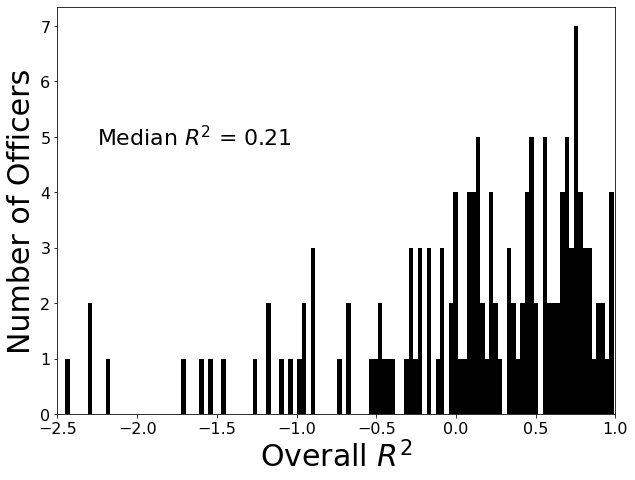

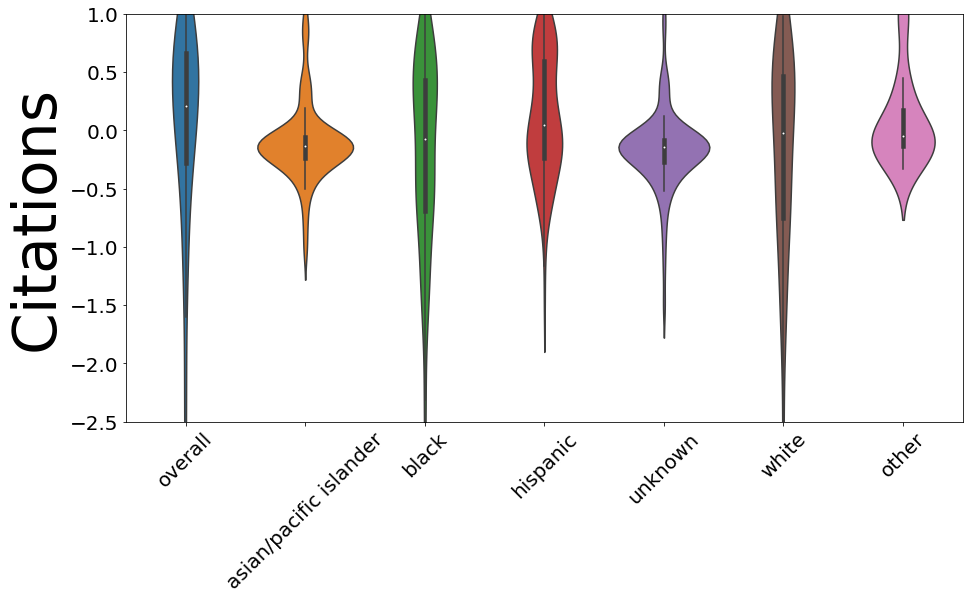

In [ ]:
# Histograms for citations as reinforcer
cites_overall = All_Fits[All_Fits['fit_type']=='overall']
cites_race = All_Fits[All_Fits['fit_type']!='overall']

# Plot hist for overall values
hist_data(round(cites_overall['r^2'], 2), xlabel='Overall $R^2$', xtext=-2.25, ytext=5, \
          num_bins=300, sv_fig_name='ovr_r2_citations_hist.png', alph=1.0, color='black')

# Violin plot for each race
violin_plot(x=All_Fits["fit_type"], y=All_Fits["r^2"], ylabel='Citations', \
            ymin=-2.5, ymax=1)

# Single-alt matching with search conducted as putative reinforcer, binned by year

In [ ]:
# We'll run these in batches. Let's see how many officers there are so we can make 5 batches
uniq_offcrs = nash_data.officer_id_hash.unique() # create the list of all officers we'll iterate through
print(len(uniq_offcrs))
print("Batch size:", len(uniq_offcrs)/5)

2295
Batch size: 459.0


/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


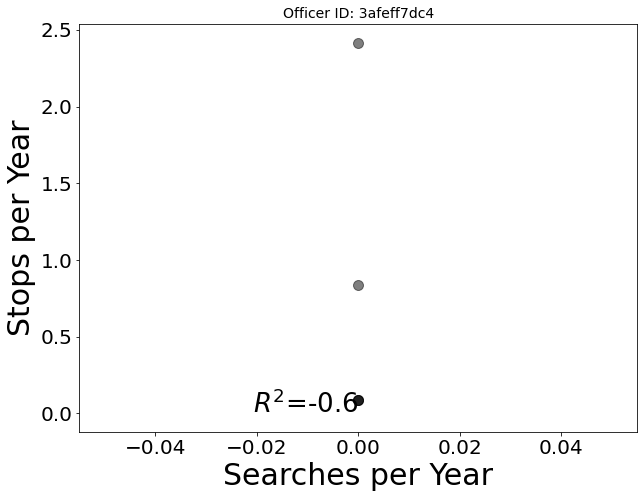

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Officer 3afeff7dc4 didn't search white
Error with officer 3afeff7dc4


/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<Figure size 720x540 with 0 Axes>

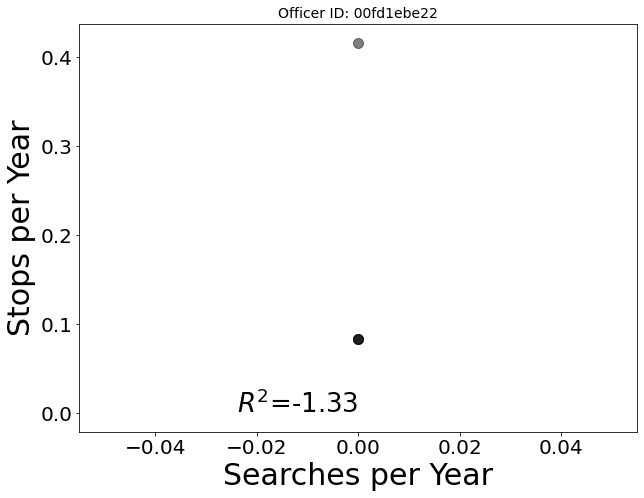

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Officer 00fd1ebe22 didn't search white
Error with officer 00fd1ebe22


<Figure size 720x540 with 0 Axes>

In [ ]:
# Lists for storing data
officer_num = []
fit_type = []
reinforcer_type = []
k_val = []
re_val = []
r2_val = []
error_officers = []

for i in uniq_offcrs[1836:2295]:
  # Isolate single officer
  offcr_hash = i
  offcr_A = nash_data[nash_data['officer_id_hash']==i]
  offcr_A = offcr_A[offcr_A['time'].notna()]
  offcr_A = offcr_A.reset_index()

  # Create year and month cols for grouping
  offcr_A['year'] = pd.DatetimeIndex(offcr_A['date']).year
  offcr_A['month'] = pd.DatetimeIndex(offcr_A['date']).month

  # Calculate rate of stops per year and rate of citations per year
  offcr_search = offcr_A.groupby(['year'])['search_conducted'].sum()
  offcr_stops = offcr_A.groupby(['year']).size()

  if len(offcr_stops) > 3:
    try:
      search_per_year = offcr_search / 12
      stops_per_year = offcr_stops / 12

      # Fit the single-alt matching equation to the officer data
      behavior = stops_per_year.values
      reinforcer = search_per_year.values
      c, cov = curve_fit(single_match, reinforcer, behavior) # Fit model
      preds_from_obs = single_match(reinforcer, *c)
      r_2 = r2_score(behavior, preds_from_obs)

      # Append data to cols
      officer_num.append(offcr_hash)
      reinforcer_type.append('search')
      fit_type.append('overall')
      k_val.append(c[0])
      re_val.append(c[1])
      r2_val.append(round(r_2, 4))

      All_Fits = pd.DataFrame({"officer_num":officer_num, "reinforcer":reinforcer_type, \
                               "fit_type":fit_type, "est_k":k_val, "est_re":re_val, "r^2":r2_val})
      All_Fits.to_csv('All_Fits_Searches_5.csv')


      # Create data for plotting the curve predicted by the single-alternative matching
      search_pred = np.linspace(0, search_per_year.max(), 100)
      stop_pred = []
      for j in list(range(len(search_pred))): # Predicted stops
        pred = round(single_match(search_pred[j], c[0], c[1]), 4)
        stop_pred.append(pred)
      
      # PLot behavior (stops) as a function of putative reinforcers (citations)
      plt.figure(figsize=(10, 7.5))
      plt.scatter(x=search_per_year, y=stops_per_year, marker='o', alpha=0.5, \
                  color='black', s=100)
      plt.plot(search_pred, stop_pred, marker='', linestyle='-', color='black')
      plt.xlabel('Searches per Year', fontsize=30)
      plt.ylabel('Stops per Year', fontsize=30)
      plt.title('Officer ID: %s' %i, fontsize =14)
      plt.text(search_per_year.max(), 0, '$R^2$=%s' %'{}'.format(round(r_2, 2)), \
              fontsize=26, horizontalalignment='right')
      plt.xticks(fontsize=20)
      plt.yticks(fontsize=20)
      plt.savefig('Officer_%s_Overall_Fit.png' %i)
      plt.show()

      # Run the same analysis, but grouped by race
      # Calculate rate of stops per year and rate of citations per year
      offcr_search = offcr_A.groupby(['year', 'subject_race'])['search_conducted'].sum().unstack()
      offcr_stops = offcr_A.groupby(['year', 'subject_race']).size().unstack()
      search_per_year = offcr_search / 12
      stops_per_year = offcr_stops / 12
      search_per_year = search_per_year.fillna(0)
      stops_per_year = stops_per_year.fillna(0)

      # Loop through each race and fit the model
      cols = list(search_per_year)
      race_plot = []
      k_plot = []
      re_plot = []
      r2_plot = []

      for k in cols:
        behavior = stops_per_year[k].values
        reinforcer = search_per_year[k].values
        param_seeds = [16, 5]
        c, cov = curve_fit(single_match, reinforcer, behavior) # Fit model
        preds_from_obs = single_match(reinforcer, *c) # predictions for observed search per month
        r_2 = r2_score(behavior, preds_from_obs) # calculate r^2 values

        # Append data to cols
        officer_num.append(offcr_hash)
        reinforcer_type.append('search')
        fit_type.append(k)
        race_plot.append(k)
        k_val.append(c[0])
        k_plot.append(c[0])
        re_val.append(c[1])
        re_plot.append(c[1])
        r2_val.append(round(r_2, 4))
        r2_plot.append(round(r_2, 4))

      # Combine race fits into single df for easier plotting by race
      fits_by_race = pd.DataFrame({"est_k":k_plot, "est_re":re_plot, "r^2":r2_plot, "race":list(search_per_year)})
      
      # Create data for plotting the curve predicted by the single-alternative matching
      search_pred = np.linspace(0, search_per_year.max(), 100)

      # Predictions for Asian/Pacific Islander
      api_pred = []
      try:
        for m in list(range(len(search_pred))):
          pred = single_match(search_pred[m], fits_by_race['est_k'][0], fits_by_race['est_re'][0])
          api_pred.append(pred)
      except:
        print("Officer %s didn't search api" %i)

      # Predictions for Black
      black_pred = []
      try:
        for m in list(range(len(search_pred))):
          pred = single_match(search_pred[m], fits_by_race['est_k'][1], fits_by_race['est_re'][1])
          black_pred.append(pred)
      except:
        print("Officer %s didn't search black" %i)

      # Predictions for Hispanic
      hispanic_pred = []
      try:
        for m in list(range(len(search_pred))):
          pred = single_match(search_pred[m], fits_by_race['est_k'][2], fits_by_race['est_re'][2])
          hispanic_pred.append(pred)
      except:
        print("Officer %s didn't search hispanic" %i)

      # Predictions for White
      white_pred = []
      try:
        for m in list(range(len(search_pred))):
          pred = single_match(search_pred[m], fits_by_race['est_k'][5], fits_by_race['est_re'][5])
          white_pred.append(pred)
      except:
        print("Officer %s didn't search white" %i)

      # PLot behavior (stops) as a function of putative reinforcers (citations)
      plt.figure(figsize=(10, 7.5))

      # Raw Data
      plt.scatter(x=search_per_year['asian/pacific islander'], y=stops_per_year['asian/pacific islander'], marker='o', alpha=0.5, \
                  color='black', s=100, label='Asian/Pacific Islander')
      plt.scatter(x=search_per_year['black'], y=stops_per_year['black'], marker='o', alpha=0.5, \
                  color='blue', s=100, label='Black')
      plt.scatter(x=search_per_year['hispanic'], y=stops_per_year['hispanic'], marker='o', alpha=0.5, \
                  color='red', s=100, label='Hispanic')
      plt.scatter(x=search_per_year['white'], y=stops_per_year['white'], marker='o', alpha=0.5, \
                  color='green', s=100, label='White')
      
      # Prediction Curves
      plt.plot(search_pred, api_pred, marker='', linestyle='-', color='black')
      plt.plot(search_pred, black_pred, marker='', linestyle='-', color='blue')
      plt.plot(search_pred, hispanic_pred, marker='', linestyle='-', color='red')
      plt.plot(search_pred, white_pred, marker='', linestyle='-', color='green')
      plt.plot(search_pred, search_pred, marker='', linestyle='--', color='gray')

      # Details
      plt.xlabel('Searches per Year', fontsize=30)
      plt.ylabel('Stops per Year', fontsize=30)
      plt.legend(fontsize=20, framealpha=0, bbox_to_anchor=(1, 0.95))
      plt.xticks(fontsize=20)
      plt.yticks(fontsize=20)
      plt.title('Officer ID: %s' %i, fontsize=14)
      plt.savefig('Officer_%s_Fit_by_Race.png' %i)
      plt.show()

      # Save data
      All_Fits = pd.DataFrame({"officer_num":officer_num, "reinforcer":reinforcer_type, "fit_type":fit_type, "est_k":k_val, "est_re":re_val, "r^2":r2_val})
      All_Fits.to_csv('All_Fits_Searches_5.csv')
  
    except:
      print('Error with officer %s' %i)
      error_officers.append(i)
      err_officers = pd.DataFrame(error_officers)
      err_officers.to_csv('Error_Officers_Searches.csv')
      All_Fits = pd.DataFrame({"officer_num":officer_num, "reinforcer":reinforcer_type, \
                               "fit_type":fit_type, "est_k":k_val, "est_re":re_val, "r^2":r2_val})
      All_Fits.to_csv('All_Fits_Searches_5.csv')

In [ ]:
df1 = pd.read_csv('All_Fits_Searches.csv')
df1 = df1.drop(['Unnamed: 0'], axis=1)
df2 = pd.read_csv('All_Fits_Searches_2.csv')
df2 = df2.drop(['Unnamed: 0'], axis=1)
df3 = pd.read_csv('All_Fits_Searches_3.csv')
df3 = df3.drop(['Unnamed: 0'], axis=1)
df4 = pd.read_csv('All_Fits_Searches_4.csv')
df4 = df4.drop(['Unnamed: 0'], axis=1)
df5 = pd.read_csv('All_Fits_Searches_5.csv')
df5 = df5.drop(['Unnamed: 0'], axis=1)

In [ ]:
all_fits_searches = df1.append([df2, df3, df4, df5])
all_fits_searches.to_csv('All_Fits_Searches.csv')

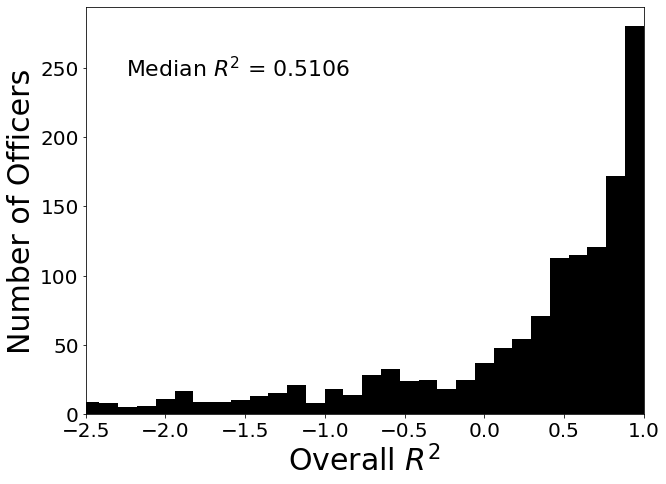

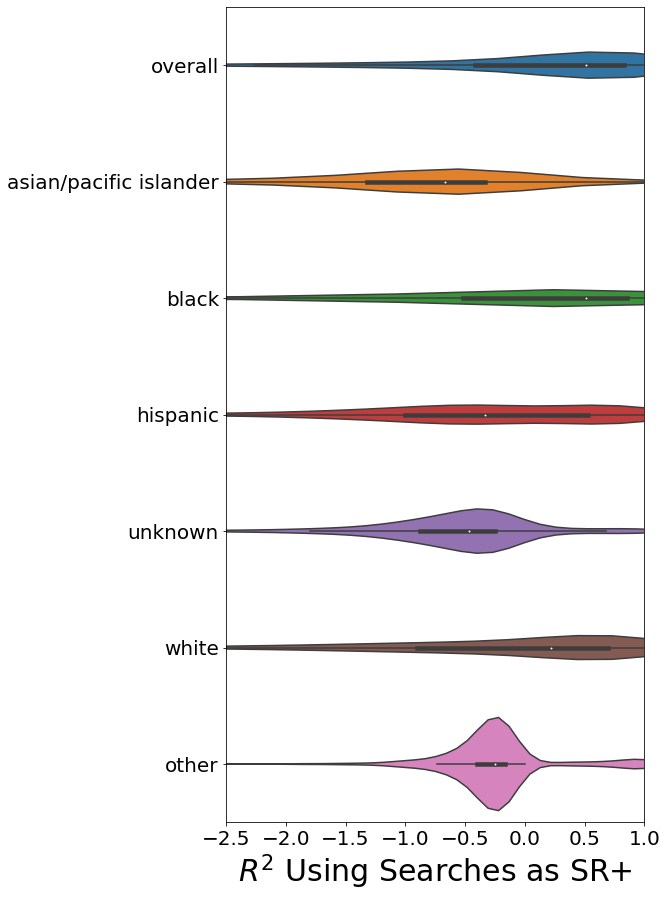

In [ ]:
# Histograms for searches as reinforcer
searches_overall = all_fits_searches[all_fits_searches['fit_type']=='overall']
median = round(searches_overall['r^2'].median(), 4)
plt.figure(figsize=(10, 7.5))
plt.hist(searches_overall['r^2'], bins=300, color='black')
plt.xlabel('Overall $R^2$', fontsize=30)
plt.ylabel('Number of Officers', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(-2.5, 1)
plt.text(-2.25, 250, "Median $R^2$ = %s" %median, fontsize=22, \
        horizontalalignment='left', verticalalignment='center')
plt.savefig('ovr_r2_searches_hist.png')
plt.show()

# Violin plot for each race
plt.figure(figsize=(7.5, 15))
sns.violinplot(x=all_fits_searches["r^2"], y=all_fits_searches["fit_type"])
plt.xlim(-2.5, 1)
plt.xlabel('$R^2$ Using Searches as SR+', fontsize=30)
plt.ylabel('', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('race_r2_searches_violin.png')
plt.show()

# Single-alt matching with frisks performed as putative reinforcer, binned by year

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


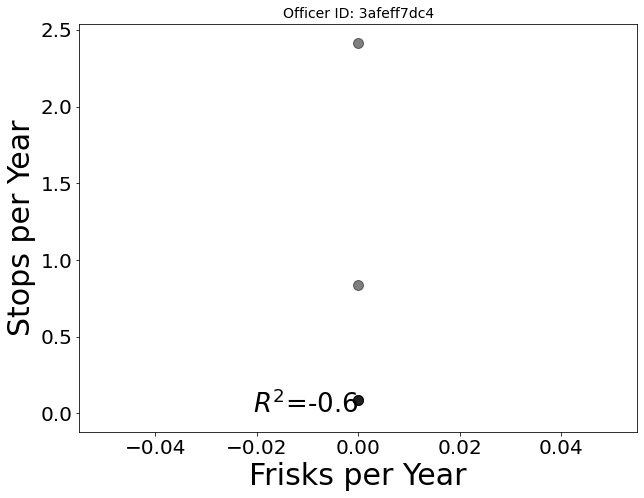

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Officer 3afeff7dc4 didn't white
Error with officer 3afeff7dc4


/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<Figure size 720x540 with 0 Axes>

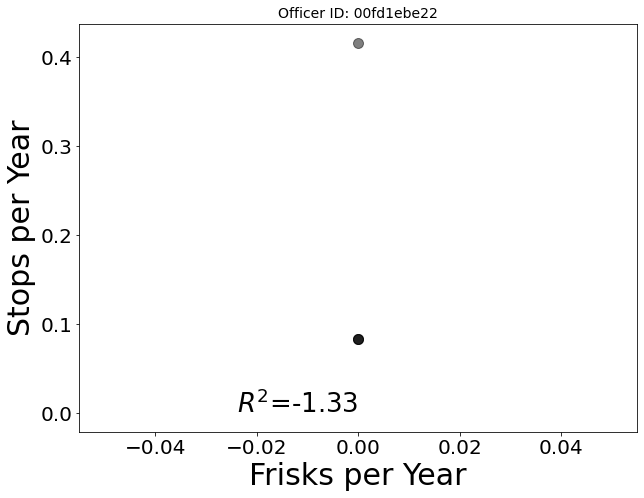

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Officer 00fd1ebe22 didn't white
Error with officer 00fd1ebe22


<Figure size 720x540 with 0 Axes>

In [ ]:
# Lists for storing data
officer_num = []
fit_type = []
reinforcer_type = []
k_val = []
re_val = []
r2_val = []
error_officers = []

for i in uniq_offcrs[1836:2295]:
  # Isolate single officer
  offcr_hash = i
  offcr_A = nash_data[nash_data['officer_id_hash']==i]
  offcr_A = offcr_A[offcr_A['time'].notna()]
  offcr_A = offcr_A.reset_index()

  # Create year and month cols for grouping
  offcr_A['year'] = pd.DatetimeIndex(offcr_A['date']).year
  offcr_A['month'] = pd.DatetimeIndex(offcr_A['date']).month

  # Calculate rate of stops per year and rate of citations per year
  offcr_frisk = offcr_A.groupby(['year'])['frisk_performed'].sum()
  offcr_stops = offcr_A.groupby(['year']).size()

  if len(offcr_stops) > 3:
    try:
      frisk_per_year = offcr_frisk / 12
      stops_per_year = offcr_stops / 12

      # Fit the single-alt matching equation to the officer data
      behavior = stops_per_year.values
      reinforcer = frisk_per_year.values
      c, cov = curve_fit(single_match, reinforcer, behavior) # Fit model
      preds_from_obs = single_match(reinforcer, *c)
      r_2 = r2_score(behavior, preds_from_obs)

      # Append data to cols
      officer_num.append(offcr_hash)
      reinforcer_type.append('frisk')
      fit_type.append('overall')
      k_val.append(c[0])
      re_val.append(c[1])
      r2_val.append(round(r_2, 4))

      All_Fits = pd.DataFrame({"officer_num":officer_num, "reinforcer":reinforcer_type, \
                               "fit_type":fit_type, "est_k":k_val, "est_re":re_val, "r^2":r2_val})
      All_Fits.to_csv('All_Fits_Frisks_5.csv')


      # Create data for plotting the curve predicted by the single-alternative matching
      frisk_pred = np.linspace(0, frisk_per_year.max(), 100)
      stop_pred = []
      for j in list(range(len(frisk_pred))): # Predicted stops
        pred = round(single_match(frisk_pred[j], c[0], c[1]), 4)
        stop_pred.append(pred)
      
      # PLot behavior (stops) as a function of putative reinforcers (citations)
      plt.figure(figsize=(10, 7.5))
      plt.scatter(x=frisk_per_year, y=stops_per_year, marker='o', alpha=0.5, \
                  color='black', s=100)
      plt.plot(frisk_pred, stop_pred, marker='', linestyle='-', color='black')
      plt.xlabel('Frisks per Year', fontsize=30)
      plt.ylabel('Stops per Year', fontsize=30)
      plt.title('Officer ID: %s' %i, fontsize =14)
      plt.text(frisk_per_year.max(), 0, '$R^2$=%s' %'{}'.format(round(r_2, 2)), \
              fontsize=26, horizontalalignment='right')
      plt.xticks(fontsize=20)
      plt.yticks(fontsize=20)
      plt.savefig('Officer_%s_Overall_Fit.png' %i)
      plt.show()

      # Run the same analysis, but grouped by race
      # Calculate rate of stops per year and rate of citations per year
      offcr_frisk = offcr_A.groupby(['year', 'subject_race'])['frisk_performed'].sum().unstack()
      offcr_stops = offcr_A.groupby(['year', 'subject_race']).size().unstack()
      frisk_per_year = offcr_frisk / 12
      stops_per_year = offcr_stops / 12
      frisk_per_year = frisk_per_year.fillna(0)
      stops_per_year = stops_per_year.fillna(0)

      # Loop through each race and fit the model
      cols = list(frisk_per_year)
      race_plot = []
      k_plot = []
      re_plot = []
      r2_plot = []

      for k in cols:
        behavior = stops_per_year[k].values
        reinforcer = frisk_per_year[k].values
        param_seeds = [16, 5]
        c, cov = curve_fit(single_match, reinforcer, behavior) # Fit model
        preds_from_obs = single_match(reinforcer, *c) # predictions for observed frisk per month
        r_2 = r2_score(behavior, preds_from_obs) # calculate r^2 values

        # Append data to cols
        officer_num.append(offcr_hash)
        reinforcer_type.append('frisk')
        fit_type.append(k)
        race_plot.append(k)
        k_val.append(c[0])
        k_plot.append(c[0])
        re_val.append(c[1])
        re_plot.append(c[1])
        r2_val.append(round(r_2, 4))
        r2_plot.append(round(r_2, 4))

      # Combine race fits into single df for easier plotting by race
      fits_by_race = pd.DataFrame({"est_k":k_plot, "est_re":re_plot, "r^2":r2_plot, "race":list(frisk_per_year)})
      
      # Create data for plotting the curve predicted by the single-alternative matching
      frisk_pred = np.linspace(0, frisk_per_year.max(), 100)

      # Predictions for Asian/Pacific Islander
      api_pred = []
      try:
        for m in list(range(len(frisk_pred))):
          pred = single_match(frisk_pred[m], fits_by_race['est_k'][0], fits_by_race['est_re'][0])
          api_pred.append(pred)
      except:
        print("Officer %s didn't api" %i)

      # Predictions for Black
      black_pred = []
      try:
        for m in list(range(len(frisk_pred))):
          pred = single_match(frisk_pred[m], fits_by_race['est_k'][1], fits_by_race['est_re'][1])
          black_pred.append(pred)
      except:
        print("Officer %s didn't black" %i)

      # Predictions for Hispanic
      hispanic_pred = []
      try:
        for m in list(range(len(frisk_pred))):
          pred = single_match(frisk_pred[m], fits_by_race['est_k'][2], fits_by_race['est_re'][2])
          hispanic_pred.append(pred)
      except:
        print("Officer %s didn't hispanic" %i)

      # Predictions for White
      white_pred = []
      try:
        for m in list(range(len(frisk_pred))):
          pred = single_match(frisk_pred[m], fits_by_race['est_k'][5], fits_by_race['est_re'][5])
          white_pred.append(pred)
      except:
        print("Officer %s didn't white" %i)

      # PLot behavior (stops) as a function of putative reinforcers (citations)
      plt.figure(figsize=(10, 7.5))

      # Raw Data
      plt.scatter(x=frisk_per_year['asian/pacific islander'], y=stops_per_year['asian/pacific islander'], marker='o', alpha=0.5, \
                  color='black', s=100, label='Asian/Pacific Islander')
      plt.scatter(x=frisk_per_year['black'], y=stops_per_year['black'], marker='o', alpha=0.5, \
                  color='blue', s=100, label='Black')
      plt.scatter(x=frisk_per_year['hispanic'], y=stops_per_year['hispanic'], marker='o', alpha=0.5, \
                  color='red', s=100, label='Hispanic')
      plt.scatter(x=frisk_per_year['white'], y=stops_per_year['white'], marker='o', alpha=0.5, \
                  color='green', s=100, label='White')
      
      # Prediction Curves
      plt.plot(frisk_pred, api_pred, marker='', linestyle='-', color='black')
      plt.plot(frisk_pred, black_pred, marker='', linestyle='-', color='blue')
      plt.plot(frisk_pred, hispanic_pred, marker='', linestyle='-', color='red')
      plt.plot(frisk_pred, white_pred, marker='', linestyle='-', color='green')
      plt.plot(frisk_pred, frisk_pred, marker='', linestyle='--', color='gray')

      # Details
      plt.xlabel('Frisks per Year', fontsize=30)
      plt.ylabel('Stops per Year', fontsize=30)
      plt.legend(fontsize=20, framealpha=0, bbox_to_anchor=(1, 0.95))
      plt.xticks(fontsize=20)
      plt.yticks(fontsize=20)
      plt.title('Officer ID: %s' %i, fontsize=14)
      plt.savefig('Officer_%s_Fit_by_Race.png' %i)
      plt.show()

      # Save data
      All_Fits = pd.DataFrame({"officer_num":officer_num, "reinforcer":reinforcer_type, "fit_type":fit_type, "est_k":k_val, "est_re":re_val, "r^2":r2_val})
      All_Fits.to_csv('All_Fits_Frisks_5.csv')
  
    except:
      print('Error with officer %s' %i)
      error_officers.append(i)
      err_officers = pd.DataFrame(error_officers)
      err_officers.to_csv('Error_Officers_Frisks.csv')
      All_Fits = pd.DataFrame({"officer_num":officer_num, "reinforcer":reinforcer_type, \
                               "fit_type":fit_type, "est_k":k_val, "est_re":re_val, "r^2":r2_val})
      All_Fits.to_csv('All_Fits_Frisks_5.csv')

In [ ]:
# Combine all the frisk fits dfs into a single df
df1 = pd.read_csv('All_Fits_Frisks_1.csv')
df1 = df1.drop(['Unnamed: 0'], axis=1)
df2 = pd.read_csv('All_Fits_Frisks_2.csv')
df2 = df2.drop(['Unnamed: 0'], axis=1)
df3 = pd.read_csv('All_Fits_Frisks_3.csv')
df3 = df3.drop(['Unnamed: 0'], axis=1)
df4 = pd.read_csv('All_Fits_Frisks_4.csv')
df4 = df4.drop(['Unnamed: 0'], axis=1)
df5 = pd.read_csv('All_Fits_Frisks_5.csv')
df5 = df5.drop(['Unnamed: 0'], axis=1)
all_fits_frisk = df1.append([df2, df3, df4, df5])
all_fits_frisk.to_csv('All_Fits_Frisks.csv')

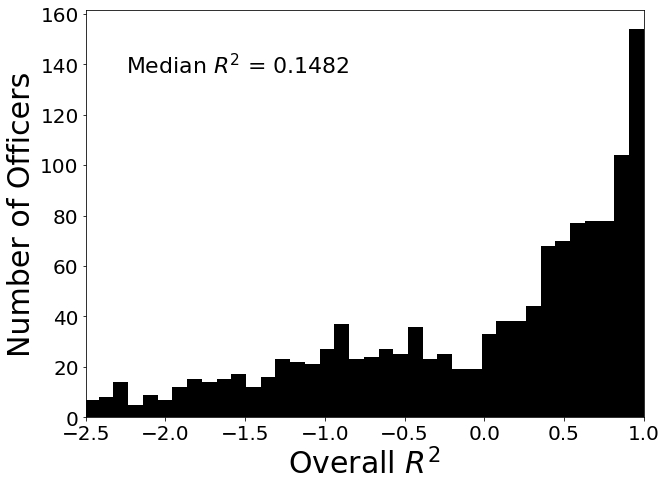

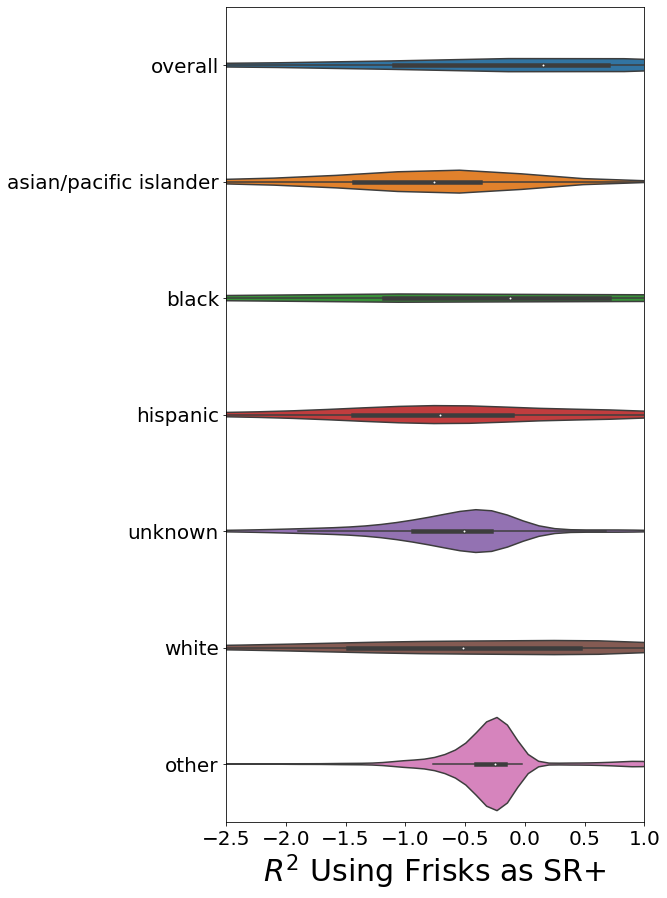

In [ ]:
# Histograms for searches as reinforcer
frisks_overall = all_fits_frisk[all_fits_frisk['fit_type']=='overall']
median = round(frisks_overall['r^2'].median(), 4)
plt.figure(figsize=(10, 7.5))
plt.hist(frisks_overall['r^2'], bins=1000, color='black')
plt.xlabel('Overall $R^2$', fontsize=30)
plt.ylabel('Number of Officers', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(-2.5, 1)
plt.text(-2.25, 140, "Median $R^2$ = %s" %median, fontsize=22, \
        horizontalalignment='left', verticalalignment='center')
plt.savefig('ovr_r2_frisks_hist.png')
plt.show()

# Violin plot for each race
plt.figure(figsize=(7.5, 15))
sns.violinplot(x=all_fits_frisk["r^2"], y=all_fits_frisk["fit_type"])
plt.xlim(-2.5, 1)
plt.xlabel('$R^2$ Using Frisks as SR+', fontsize=30)
plt.ylabel('', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('race_r2_frisks_violin.png')
plt.show()

# Single-alt matching with contraband found as putative reinforcer, binned by year

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


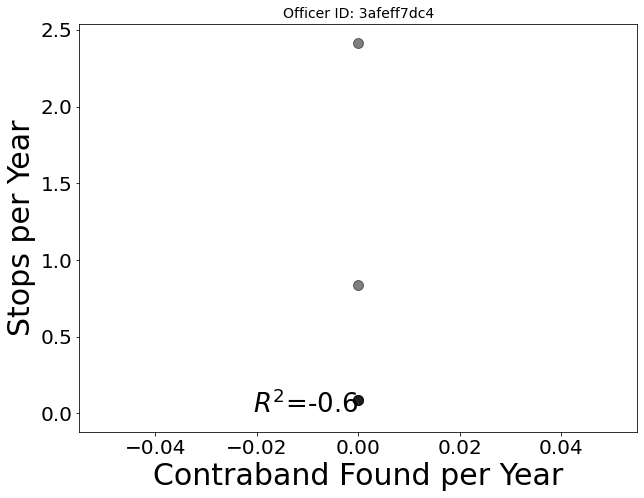

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Officer 3afeff7dc4 didn't white
Error with officer 3afeff7dc4


/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<Figure size 720x540 with 0 Axes>

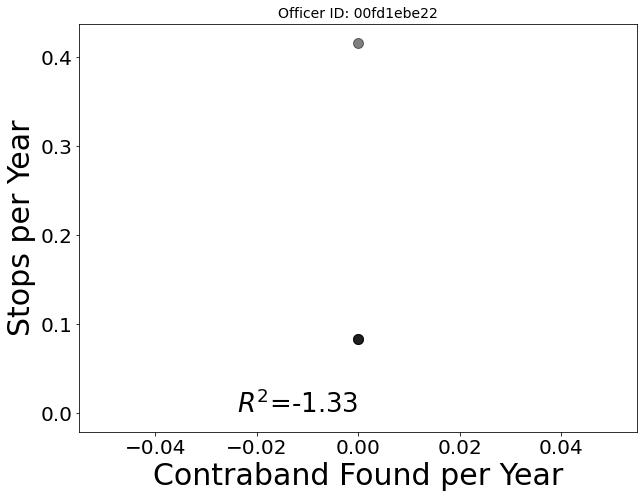

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Officer 00fd1ebe22 didn't white
Error with officer 00fd1ebe22


<Figure size 720x540 with 0 Axes>

In [ ]:
# Lists for storing data
officer_num = []
fit_type = []
reinforcer_type = []
k_val = []
re_val = []
r2_val = []
error_officers = []

for i in uniq_offcrs[1836:2295]:
  # Isolate single officer
  offcr_hash = i
  offcr_A = nash_data[nash_data['officer_id_hash']==i]
  offcr_A = offcr_A[offcr_A['time'].notna()]
  offcr_A = offcr_A.reset_index()

  # Create year and month cols for grouping
  offcr_A['year'] = pd.DatetimeIndex(offcr_A['date']).year
  offcr_A['month'] = pd.DatetimeIndex(offcr_A['date']).month

  # Calculate rate of stops per year and rate of citations per year
  offcr_contraband = offcr_A.groupby(['year'])['contraband_found'].sum()
  offcr_stops = offcr_A.groupby(['year']).size()

  if len(offcr_stops) > 3:
    try:
      contraband_per_year = offcr_contraband / 12
      stops_per_year = offcr_stops / 12

      # Fit the single-alt matching equation to the officer data
      behavior = stops_per_year.values
      reinforcer = contraband_per_year.values
      c, cov = curve_fit(single_match, reinforcer, behavior) # Fit model
      preds_from_obs = single_match(reinforcer, *c)
      r_2 = r2_score(behavior, preds_from_obs)

      # Append data to cols
      officer_num.append(offcr_hash)
      reinforcer_type.append('contraband')
      fit_type.append('overall')
      k_val.append(c[0])
      re_val.append(c[1])
      r2_val.append(round(r_2, 4))

      All_Fits = pd.DataFrame({"officer_num":officer_num, "reinforcer":reinforcer_type, \
                               "fit_type":fit_type, "est_k":k_val, "est_re":re_val, "r^2":r2_val})
      All_Fits.to_csv('All_Fits_contrabands_5.csv')


      # Create data for plotting the curve predicted by the single-alternative matching
      contraband_pred = np.linspace(0, contraband_per_year.max(), 100)
      stop_pred = []
      for j in list(range(len(contraband_pred))): # Predicted stops
        pred = round(single_match(contraband_pred[j], c[0], c[1]), 4)
        stop_pred.append(pred)
      
      # PLot behavior (stops) as a function of putative reinforcers (citations)
      plt.figure(figsize=(10, 7.5))
      plt.scatter(x=contraband_per_year, y=stops_per_year, marker='o', alpha=0.5, \
                  color='black', s=100)
      plt.plot(contraband_pred, stop_pred, marker='', linestyle='-', color='black')
      plt.xlabel('Contraband Found per Year', fontsize=30)
      plt.ylabel('Stops per Year', fontsize=30)
      plt.title('Officer ID: %s' %i, fontsize =14)
      plt.text(contraband_per_year.max(), 0, '$R^2$=%s' %'{}'.format(round(r_2, 2)), \
              fontsize=26, horizontalalignment='right')
      plt.xticks(fontsize=20)
      plt.yticks(fontsize=20)
      plt.savefig('Officer_%s_Overall_Fit.png' %i)
      plt.show()

      # Run the same analysis, but grouped by race
      # Calculate rate of stops per year and rate of citations per year
      offcr_contraband = offcr_A.groupby(['year', 'subject_race'])['contraband_found'].sum().unstack()
      offcr_stops = offcr_A.groupby(['year', 'subject_race']).size().unstack()
      contraband_per_year = offcr_contraband / 12
      stops_per_year = offcr_stops / 12
      contraband_per_year = contraband_per_year.fillna(0)
      stops_per_year = stops_per_year.fillna(0)

      # Loop through each race and fit the model
      cols = list(contraband_per_year)
      race_plot = []
      k_plot = []
      re_plot = []
      r2_plot = []

      for k in cols:
        behavior = stops_per_year[k].values
        reinforcer = contraband_per_year[k].values
        param_seeds = [16, 5]
        c, cov = curve_fit(single_match, reinforcer, behavior) # Fit model
        preds_from_obs = single_match(reinforcer, *c) # predictions for observed contraband per month
        r_2 = r2_score(behavior, preds_from_obs) # calculate r^2 values

        # Append data to cols
        officer_num.append(offcr_hash)
        reinforcer_type.append('contraband')
        fit_type.append(k)
        race_plot.append(k)
        k_val.append(c[0])
        k_plot.append(c[0])
        re_val.append(c[1])
        re_plot.append(c[1])
        r2_val.append(round(r_2, 4))
        r2_plot.append(round(r_2, 4))

      # Combine race fits into single df for easier plotting by race
      fits_by_race = pd.DataFrame({"est_k":k_plot, "est_re":re_plot, "r^2":r2_plot, "race":list(contraband_per_year)})
      
      # Create data for plotting the curve predicted by the single-alternative matching
      contraband_pred = np.linspace(0, contraband_per_year.max(), 100)

      # Predictions for Asian/Pacific Islander
      api_pred = []
      try:
        for m in list(range(len(contraband_pred))):
          pred = single_match(contraband_pred[m], fits_by_race['est_k'][0], fits_by_race['est_re'][0])
          api_pred.append(pred)
      except:
        print("Officer %s didn't api" %i)

      # Predictions for Black
      black_pred = []
      try:
        for m in list(range(len(contraband_pred))):
          pred = single_match(contraband_pred[m], fits_by_race['est_k'][1], fits_by_race['est_re'][1])
          black_pred.append(pred)
      except:
        print("Officer %s didn't black" %i)

      # Predictions for Hispanic
      hispanic_pred = []
      try:
        for m in list(range(len(contraband_pred))):
          pred = single_match(contraband_pred[m], fits_by_race['est_k'][2], fits_by_race['est_re'][2])
          hispanic_pred.append(pred)
      except:
        print("Officer %s didn't hispanic" %i)

      # Predictions for White
      white_pred = []
      try:
        for m in list(range(len(contraband_pred))):
          pred = single_match(contraband_pred[m], fits_by_race['est_k'][5], fits_by_race['est_re'][5])
          white_pred.append(pred)
      except:
        print("Officer %s didn't white" %i)

      # PLot behavior (stops) as a function of putative reinforcers (citations)
      plt.figure(figsize=(10, 7.5))

      # Raw Data
      plt.scatter(x=contraband_per_year['asian/pacific islander'], y=stops_per_year['asian/pacific islander'], marker='o', alpha=0.5, \
                  color='black', s=100, label='Asian/Pacific Islander')
      plt.scatter(x=contraband_per_year['black'], y=stops_per_year['black'], marker='o', alpha=0.5, \
                  color='blue', s=100, label='Black')
      plt.scatter(x=contraband_per_year['hispanic'], y=stops_per_year['hispanic'], marker='o', alpha=0.5, \
                  color='red', s=100, label='Hispanic')
      plt.scatter(x=contraband_per_year['white'], y=stops_per_year['white'], marker='o', alpha=0.5, \
                  color='green', s=100, label='White')
      
      # Prediction Curves
      plt.plot(contraband_pred, api_pred, marker='', linestyle='-', color='black')
      plt.plot(contraband_pred, black_pred, marker='', linestyle='-', color='blue')
      plt.plot(contraband_pred, hispanic_pred, marker='', linestyle='-', color='red')
      plt.plot(contraband_pred, white_pred, marker='', linestyle='-', color='green')
      plt.plot(contraband_pred, contraband_pred, marker='', linestyle='--', color='gray')

      # Details
      plt.xlabel('Contraband Found per Year', fontsize=30)
      plt.ylabel('Stops per Year', fontsize=30)
      plt.legend(fontsize=20, framealpha=0, bbox_to_anchor=(1, 0.95))
      plt.xticks(fontsize=20)
      plt.yticks(fontsize=20)
      plt.title('Officer ID: %s' %i, fontsize=14)
      plt.savefig('Officer_%s_Fit_by_Race.png' %i)
      plt.show()

      # Save data
      All_Fits = pd.DataFrame({"officer_num":officer_num, "reinforcer":reinforcer_type, "fit_type":fit_type, "est_k":k_val, "est_re":re_val, "r^2":r2_val})
      All_Fits.to_csv('All_Fits_contrabands_5.csv')
  
    except:
      print('Error with officer %s' %i)
      error_officers.append(i)
      err_officers = pd.DataFrame(error_officers)
      err_officers.to_csv('Error_Officers_contrabands.csv')
      All_Fits = pd.DataFrame({"officer_num":officer_num, "reinforcer":reinforcer_type, \
                               "fit_type":fit_type, "est_k":k_val, "est_re":re_val, "r^2":r2_val})
      All_Fits.to_csv('All_Fits_contrabands_5.csv')

In [ ]:
# Combine all the contraband fits dfs into a single df
df1 = pd.read_csv('All_Fits_contrabands_1.csv')
df1 = df1.drop(['Unnamed: 0'], axis=1)
df2 = pd.read_csv('All_Fits_contrabands_2.csv')
df2 = df2.drop(['Unnamed: 0'], axis=1)
df3 = pd.read_csv('All_Fits_contrabands_3.csv')
df3 = df3.drop(['Unnamed: 0'], axis=1)
df4 = pd.read_csv('All_Fits_contrabands_4.csv')
df4 = df4.drop(['Unnamed: 0'], axis=1)
df5 = pd.read_csv('All_Fits_contrabands_5.csv')
df5 = df5.drop(['Unnamed: 0'], axis=1)
all_fits_contraband = df1.append([df2, df3, df4, df5])
all_fits_contraband.to_csv('All_Fits_contrbands.csv')

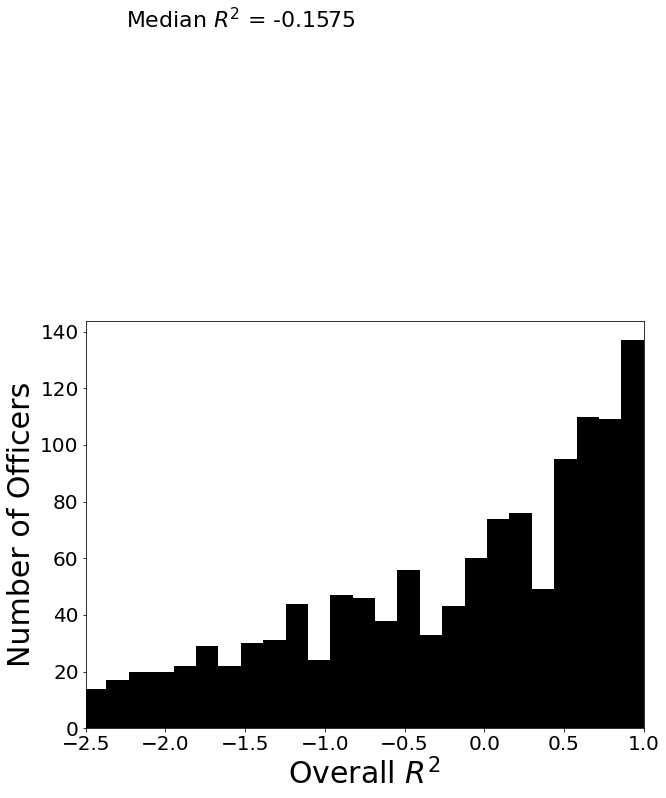

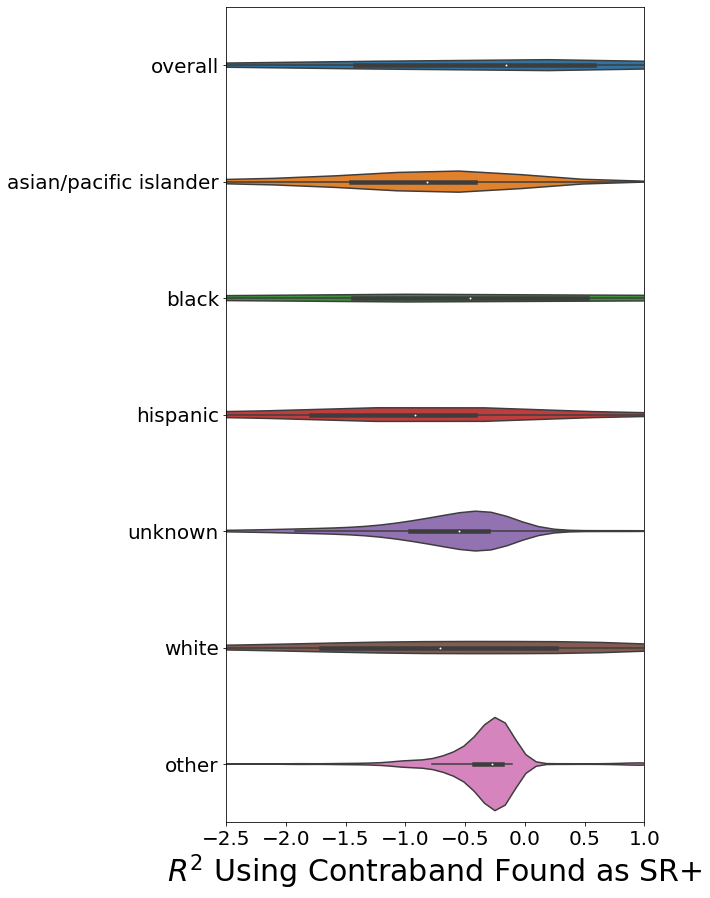

In [ ]:
# Histograms for searches as reinforcer
contrabands_overall = all_fits_contraband[all_fits_contraband['fit_type']=='overall']
median = round(contrabands_overall['r^2'].median(), 4)
plt.figure(figsize=(10, 7.5))
plt.hist(contrabands_overall['r^2'], bins=1000, color='black')
plt.xlabel('Overall $R^2$', fontsize=30)
plt.ylabel('Number of Officers', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(-2.5, 1)
plt.text(-2.25, 250, "Median $R^2$ = %s" %median, fontsize=22, \
        horizontalalignment='left', verticalalignment='center')
plt.savefig('ovr_r2_contraband_hist.png')
plt.show()

# Violin plot for each race
plt.figure(figsize=(7.5, 15))
sns.violinplot(x=all_fits_contraband["r^2"], y=all_fits_contraband["fit_type"])
plt.xlim(-2.5, 1)
plt.xlabel('$R^2$ Using Contraband Found as SR+', fontsize=30)
plt.ylabel('', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('race_r2_contraband_violin.png')
plt.show()

# Single-alt matching with arrests as putative reinforcer, binned by year

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


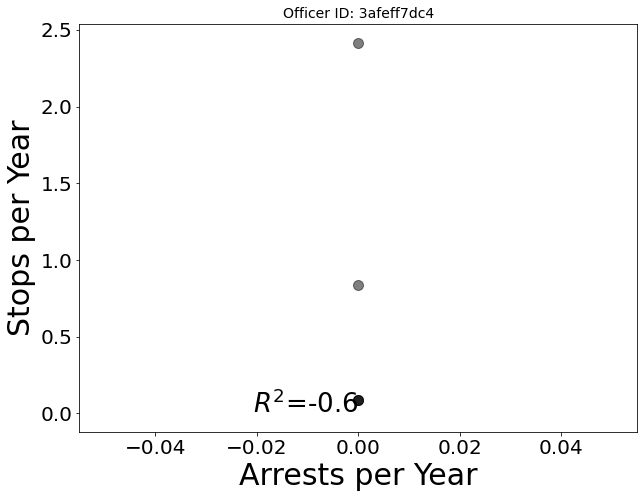

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Officer 3afeff7dc4 didn't white
Error with officer 3afeff7dc4


/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<Figure size 720x540 with 0 Axes>

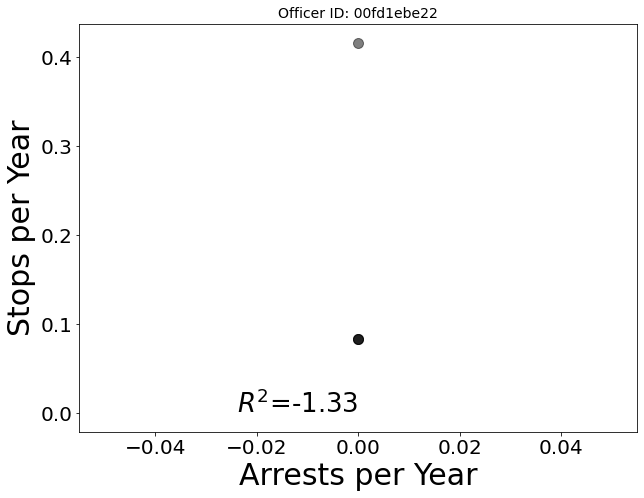

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Officer 00fd1ebe22 didn't white
Error with officer 00fd1ebe22


<Figure size 720x540 with 0 Axes>

In [ ]:
# Lists for storing data
officer_num = []
fit_type = []
reinforcer_type = []
k_val = []
re_val = []
r2_val = []
error_officers = []

for i in uniq_offcrs[1836:2295]:
  # Isolate single officer
  offcr_hash = i
  offcr_A = nash_data[nash_data['officer_id_hash']==i]
  offcr_A = offcr_A[offcr_A['time'].notna()]
  offcr_A = offcr_A.reset_index()

  # Create year and month cols for grouping
  offcr_A['year'] = pd.DatetimeIndex(offcr_A['date']).year
  offcr_A['month'] = pd.DatetimeIndex(offcr_A['date']).month

  # Calculate rate of stops per year and rate of citations per year
  offcr_arrest = offcr_A.groupby(['year'])['arrest_made'].sum()
  offcr_stops = offcr_A.groupby(['year']).size()

  if len(offcr_stops) > 3:
    try:
      arrest_per_year = offcr_arrest / 12
      stops_per_year = offcr_stops / 12

      # Fit the single-alt matching equation to the officer data
      behavior = stops_per_year.values
      reinforcer = arrest_per_year.values
      c, cov = curve_fit(single_match, reinforcer, behavior) # Fit model
      preds_from_obs = single_match(reinforcer, *c)
      r_2 = r2_score(behavior, preds_from_obs)

      # Append data to cols
      officer_num.append(offcr_hash)
      reinforcer_type.append('arrest')
      fit_type.append('overall')
      k_val.append(c[0])
      re_val.append(c[1])
      r2_val.append(round(r_2, 4))

      All_Fits = pd.DataFrame({"officer_num":officer_num, "reinforcer":reinforcer_type, \
                               "fit_type":fit_type, "est_k":k_val, "est_re":re_val, "r^2":r2_val})
      All_Fits.to_csv('All_Fits_arrests_5.csv')


      # Create data for plotting the curve predicted by the single-alternative matching
      arrest_pred = np.linspace(0, arrest_per_year.max(), 100)
      stop_pred = []
      for j in list(range(len(arrest_pred))): # Predicted stops
        pred = round(single_match(arrest_pred[j], c[0], c[1]), 4)
        stop_pred.append(pred)
      
      # PLot behavior (stops) as a function of putative reinforcers (citations)
      plt.figure(figsize=(10, 7.5))
      plt.scatter(x=arrest_per_year, y=stops_per_year, marker='o', alpha=0.5, \
                  color='black', s=100)
      plt.plot(arrest_pred, stop_pred, marker='', linestyle='-', color='black')
      plt.xlabel('Arrests per Year', fontsize=30)
      plt.ylabel('Stops per Year', fontsize=30)
      plt.title('Officer ID: %s' %i, fontsize =14)
      plt.text(arrest_per_year.max(), 0, '$R^2$=%s' %'{}'.format(round(r_2, 2)), \
              fontsize=26, horizontalalignment='right')
      plt.xticks(fontsize=20)
      plt.yticks(fontsize=20)
      plt.savefig('Officer_%s_Overall_Fit.png' %i)
      plt.show()

      # Run the same analysis, but grouped by race
      # Calculate rate of stops per year and rate of citations per year
      offcr_arrest = offcr_A.groupby(['year', 'subject_race'])['arrest_made'].sum().unstack()
      offcr_stops = offcr_A.groupby(['year', 'subject_race']).size().unstack()
      arrest_per_year = offcr_arrest / 12
      stops_per_year = offcr_stops / 12
      arrest_per_year = arrest_per_year.fillna(0)
      stops_per_year = stops_per_year.fillna(0)

      # Loop through each race and fit the model
      cols = list(arrest_per_year)
      race_plot = []
      k_plot = []
      re_plot = []
      r2_plot = []

      for k in cols:
        behavior = stops_per_year[k].values
        reinforcer = arrest_per_year[k].values
        param_seeds = [16, 5]
        c, cov = curve_fit(single_match, reinforcer, behavior) # Fit model
        preds_from_obs = single_match(reinforcer, *c) # predictions for observed arrest per month
        r_2 = r2_score(behavior, preds_from_obs) # calculate r^2 values

        # Append data to cols
        officer_num.append(offcr_hash)
        reinforcer_type.append('arrest')
        fit_type.append(k)
        race_plot.append(k)
        k_val.append(c[0])
        k_plot.append(c[0])
        re_val.append(c[1])
        re_plot.append(c[1])
        r2_val.append(round(r_2, 4))
        r2_plot.append(round(r_2, 4))

      # Combine race fits into single df for easier plotting by race
      fits_by_race = pd.DataFrame({"est_k":k_plot, "est_re":re_plot, "r^2":r2_plot, "race":list(arrest_per_year)})
      
      # Create data for plotting the curve predicted by the single-alternative matching
      arrest_pred = np.linspace(0, arrest_per_year.max(), 100)

      # Predictions for Asian/Pacific Islander
      api_pred = []
      try:
        for m in list(range(len(arrest_pred))):
          pred = single_match(arrest_pred[m], fits_by_race['est_k'][0], fits_by_race['est_re'][0])
          api_pred.append(pred)
      except:
        print("Officer %s didn't api" %i)

      # Predictions for Black
      black_pred = []
      try:
        for m in list(range(len(arrest_pred))):
          pred = single_match(arrest_pred[m], fits_by_race['est_k'][1], fits_by_race['est_re'][1])
          black_pred.append(pred)
      except:
        print("Officer %s didn't black" %i)

      # Predictions for Hispanic
      hispanic_pred = []
      try:
        for m in list(range(len(arrest_pred))):
          pred = single_match(arrest_pred[m], fits_by_race['est_k'][2], fits_by_race['est_re'][2])
          hispanic_pred.append(pred)
      except:
        print("Officer %s didn't hispanic" %i)

      # Predictions for White
      white_pred = []
      try:
        for m in list(range(len(arrest_pred))):
          pred = single_match(arrest_pred[m], fits_by_race['est_k'][5], fits_by_race['est_re'][5])
          white_pred.append(pred)
      except:
        print("Officer %s didn't white" %i)

      # PLot behavior (stops) as a function of putative reinforcers (citations)
      plt.figure(figsize=(10, 7.5))

      # Raw Data
      plt.scatter(x=arrest_per_year['asian/pacific islander'], y=stops_per_year['asian/pacific islander'], marker='o', alpha=0.5, \
                  color='black', s=100, label='Asian/Pacific Islander')
      plt.scatter(x=arrest_per_year['black'], y=stops_per_year['black'], marker='o', alpha=0.5, \
                  color='blue', s=100, label='Black')
      plt.scatter(x=arrest_per_year['hispanic'], y=stops_per_year['hispanic'], marker='o', alpha=0.5, \
                  color='red', s=100, label='Hispanic')
      plt.scatter(x=arrest_per_year['white'], y=stops_per_year['white'], marker='o', alpha=0.5, \
                  color='green', s=100, label='White')
      
      # Prediction Curves
      plt.plot(arrest_pred, api_pred, marker='', linestyle='-', color='black')
      plt.plot(arrest_pred, black_pred, marker='', linestyle='-', color='blue')
      plt.plot(arrest_pred, hispanic_pred, marker='', linestyle='-', color='red')
      plt.plot(arrest_pred, white_pred, marker='', linestyle='-', color='green')
      plt.plot(arrest_pred, arrest_pred, marker='', linestyle='--', color='gray')

      # Details
      plt.xlabel('Arrests per Year', fontsize=30)
      plt.ylabel('Stops per Year', fontsize=30)
      plt.legend(fontsize=20, framealpha=0, bbox_to_anchor=(1, 0.95))
      plt.xticks(fontsize=20)
      plt.yticks(fontsize=20)
      plt.title('Officer ID: %s' %i, fontsize=14)
      plt.savefig('Officer_%s_Fit_by_Race.png' %i)
      plt.show()

      # Save data
      All_Fits = pd.DataFrame({"officer_num":officer_num, "reinforcer":reinforcer_type, "fit_type":fit_type, "est_k":k_val, "est_re":re_val, "r^2":r2_val})
      All_Fits.to_csv('All_Fits_arrests_5.csv')
  
    except:
      print('Error with officer %s' %i)
      error_officers.append(i)
      err_officers = pd.DataFrame(error_officers)
      err_officers.to_csv('Error_Officers_arrests.csv')
      All_Fits = pd.DataFrame({"officer_num":officer_num, "reinforcer":reinforcer_type, \
                               "fit_type":fit_type, "est_k":k_val, "est_re":re_val, "r^2":r2_val})
      All_Fits.to_csv('All_Fits_arrests_5.csv')

In [ ]:
# Combine all the frisk fits dfs into a single df
df1 = pd.read_csv('All_Fits_arrests_1.csv')
df1 = df1.drop(['Unnamed: 0'], axis=1)
df2 = pd.read_csv('All_Fits_arrests_2.csv')
df2 = df2.drop(['Unnamed: 0'], axis=1)
df3 = pd.read_csv('All_Fits_arrests_3.csv')
df3 = df3.drop(['Unnamed: 0'], axis=1)
df4 = pd.read_csv('All_Fits_arrests_4.csv')
df4 = df4.drop(['Unnamed: 0'], axis=1)
df5 = pd.read_csv('All_Fits_arrests_5.csv')
df5 = df5.drop(['Unnamed: 0'], axis=1)
all_fits_arrests = df1.append([df2, df3, df4, df5])
all_fits_arrests.to_csv('All_Fits_Arrests.csv')

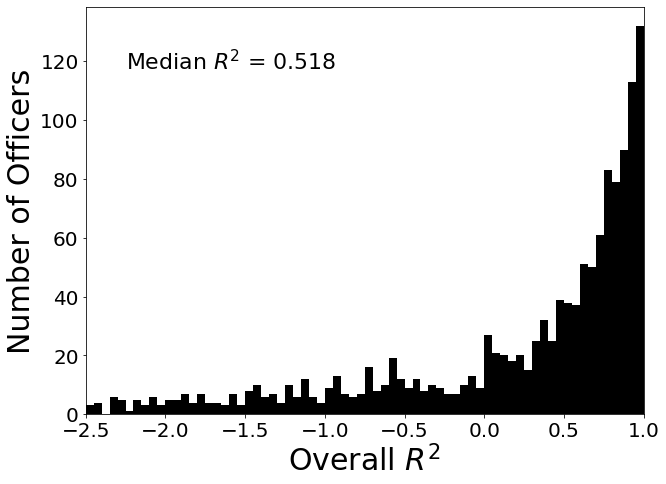

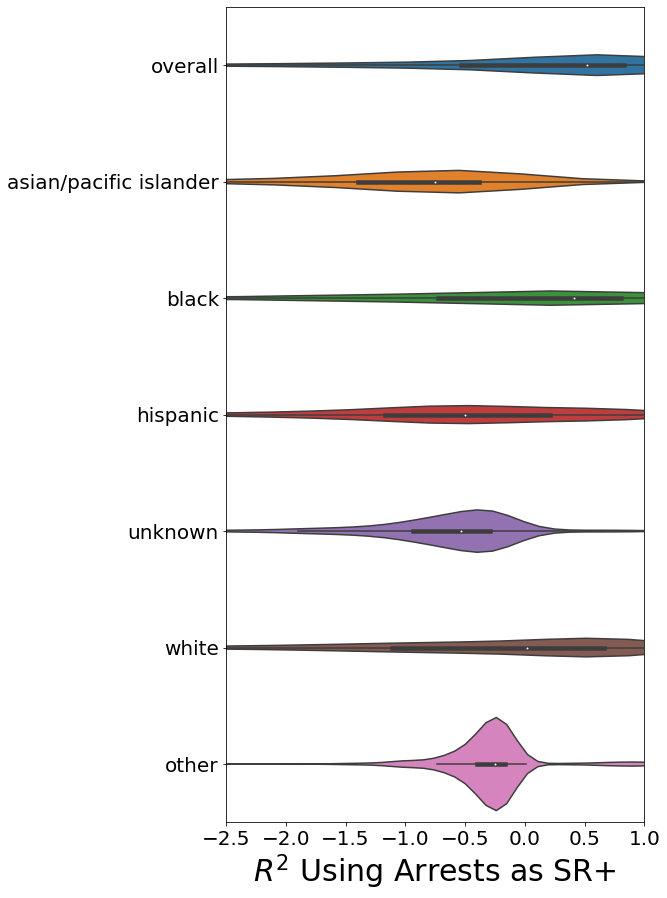

In [ ]:
# Histograms for searches as reinforcer
arrests_overall = all_fits_arrests[all_fits_arrests['fit_type']=='overall']
median = round(arrests_overall['r^2'].median(), 4)
plt.figure(figsize=(10, 7.5))
plt.hist(arrests_overall['r^2'], bins=1000, color='black')
plt.xlabel('Overall $R^2$', fontsize=30)
plt.ylabel('Number of Officers', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(-2.5, 1)
plt.text(-2.25, 120, "Median $R^2$ = %s" %median, fontsize=22, \
        horizontalalignment='left', verticalalignment='center')
plt.savefig('ovr_r2_arrests_hist.png')
plt.show()

# Violin plot for each race
plt.figure(figsize=(7.5, 15))
sns.violinplot(x=all_fits_arrests["r^2"], y=all_fits_arrests["fit_type"])
plt.xlim(-2.5, 1)
plt.xlabel('$R^2$ Using Arrests as SR+', fontsize=30)
plt.ylabel('', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('race_r2_arrests_violin.png')
plt.show()

# Single-alt matching with contraband as putative reinforcer for search behavior, binned by year

In [ ]:
print(459, 459*2, 459*3, 459*4, 459*5)

459 918 1377 1836 2295


/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


ValueError: ignored

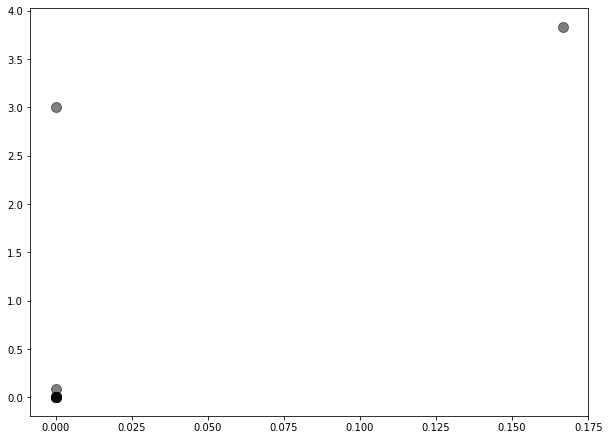

In [ ]:
# Lists for storing data
officer_num = []
fit_type = []
reinforcer_type = []
k_val = []
re_val = []
r2_val = []
error_officers = []

for i in uniq_offcrs[:459]:
  # Isolate single officer
  offcr_hash = i
  offcr_A = nash_data[nash_data['officer_id_hash']==i]
  offcr_A = offcr_A[offcr_A['time'].notna()]
  offcr_A = offcr_A.reset_index()

  # Create year and month cols for grouping
  offcr_A['year'] = pd.DatetimeIndex(offcr_A['date']).year
  offcr_A['month'] = pd.DatetimeIndex(offcr_A['date']).month

  # Calculate rate of stops per year and rate of citations per year
  offcr_searches = offcr_A.groupby(['year'])['search_conducted'].sum()
  offcr_contraband = offcr_A.groupby(['year'])['contraband_found'].sum()

  if len(offcr_searches) > 3:
    #try:
    contraband_per_year = offcr_contraband / 12
    searches_per_year = offcr_searches / 12

    # Fit the single-alt matching equation to the officer data
    behavior = searches_per_year.values
    reinforcer = contraband_per_year.values
    c, cov = curve_fit(single_match, reinforcer, behavior) # Fit model
    preds_from_obs = single_match(reinforcer, *c)
    r_2 = r2_score(behavior, preds_from_obs)

    # Append data to cols
    officer_num.append(offcr_hash)
    reinforcer_type.append('contra_for_search')
    fit_type.append('overall')
    k_val.append(c[0])
    re_val.append(c[1])
    r2_val.append(round(r_2, 4))

    All_Fits = pd.DataFrame({"officer_num":officer_num, "reinforcer":reinforcer_type, \
                              "fit_type":fit_type, "est_k":k_val, "est_re":re_val, "r^2":r2_val})
    All_Fits.to_csv('All_Fits_Contra_Search_1.csv')


    # Create data for plotting the curve predicted by the single-alternative matching
    contraband_pred = np.linspace(0, contraband_per_year.max(), 100)
    search_pred = []
    for j in list(range(len(contraband_pred))): # Predicted stops
      pred = round(single_match(contraband_pred[j], c[0], c[1]), 4)
      search_pred.append(pred)
    
    # PLot behavior (stops) as a function of putative reinforcers (citations)
    plt.figure(figsize=(10, 7.5))
    plt.scatter(x=contraband_per_year, y=searches_per_year, marker='o', alpha=0.5, \
                color='black', s=100)
    plt.plot(contraband_per_year, search_pred, marker='', linestyle='-', color='black')
    plt.xlabel('Contraband Found per Year', fontsize=30)
    plt.ylabel('Searches per Year', fontsize=30)
    plt.title('Officer ID: %s' %i, fontsize =14)
    plt.text(contraband_per_year.max(), 0, '$R^2$=%s' %'{}'.format(round(r_2, 2)), \
            fontsize=26, horizontalalignment='right')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.savefig('Officer_%s_Overall_Fit.png' %i)
    plt.show()

    # Run the same analysis, but grouped by race
    # Calculate rate of stops per year and rate of citations per year
    offcr_contraband = offcr_A.groupby(['year', 'subject_race'])['contraband_found'].sum().unstack()
    offcr_searches = offcr_A.groupby(['year', 'subject_race'])['search_conducted'].sum().unstack()
    contraband_per_year = offcr_contraband / 12
    search_per_year = offcr_searches / 12
    contraband_per_year = contraband_per_year.fillna(0)
    search_per_year = search_per_year.fillna(0)

    # Loop through each race and fit the model
    cols = list(contraband_per_year)
    race_plot = []
    k_plot = []
    re_plot = []
    r2_plot = []

    for k in cols:
      behavior = search_per_year[k].values
      reinforcer = contraband_per_year[k].values
      param_seeds = [16, 5]
      c, cov = curve_fit(single_match, reinforcer, behavior) # Fit model
      preds_from_obs = single_match(reinforcer, *c) # predictions for observed arrest per month
      r_2 = r2_score(behavior, preds_from_obs) # calculate r^2 values

      # Append data to cols
      officer_num.append(offcr_hash)
      reinforcer_type.append('contra_for_search')
      fit_type.append(k)
      race_plot.append(k)
      k_val.append(c[0])
      k_plot.append(c[0])
      re_val.append(c[1])
      re_plot.append(c[1])
      r2_val.append(round(r_2, 4))
      r2_plot.append(round(r_2, 4))

    # Combine race fits into single df for easier plotting by race
    fits_by_race = pd.DataFrame({"est_k":k_plot, "est_re":re_plot, "r^2":r2_plot, "race":list(contraband_per_year)})
    
    # Create data for plotting the curve predicted by the single-alternative matching
    contraband_pred = np.linspace(0, contraband_per_year.max(), 100)

    # Predictions for Asian/Pacific Islander
    api_pred = []
    try:
      for m in list(range(len(contraband_pred))):
        pred = single_match(contraband_pred[m], fits_by_race['est_k'][0], fits_by_race['est_re'][0])
        api_pred.append(pred)
    except:
      print("Officer %s didn't api" %i)

    # Predictions for Black
    black_pred = []
    try:
      for m in list(range(len(contraband_pred))):
        pred = single_match(contraband_pred[m], fits_by_race['est_k'][1], fits_by_race['est_re'][1])
        black_pred.append(pred)
    except:
      print("Officer %s didn't black" %i)

    # Predictions for Hispanic
    hispanic_pred = []
    try:
      for m in list(range(len(contraband_pred))):
        pred = single_match(contraband_pred[m], fits_by_race['est_k'][2], fits_by_race['est_re'][2])
        hispanic_pred.append(pred)
    except:
      print("Officer %s didn't hispanic" %i)

    # Predictions for White
    white_pred = []
    try:
      for m in list(range(len(contraband_pred))):
        pred = single_match(contraband_pred[m], fits_by_race['est_k'][5], fits_by_race['est_re'][5])
        white_pred.append(pred)
    except:
      print("Officer %s didn't white" %i)

    # Plot behavior (stops) as a function of putative reinforcers (citations)
    plt.figure(figsize=(10, 7.5))

    # Raw Data
    plt.scatter(x=contraband_per_year['asian/pacific islander'], y=stops_pesearch_per_yearr_year['asian/pacific islander'], marker='o', alpha=0.5, \
                color='black', s=100, label='Asian/Pacific Islander')
    plt.scatter(x=contraband_per_year['black'], y=search_per_year['black'], marker='o', alpha=0.5, \
                color='blue', s=100, label='Black')
    plt.scatter(x=contraband_per_year['hispanic'], y=search_per_year['hispanic'], marker='o', alpha=0.5, \
                color='red', s=100, label='Hispanic')
    plt.scatter(x=contraband_per_year['white'], y=search_per_year['white'], marker='o', alpha=0.5, \
                color='green', s=100, label='White')
    
    # Prediction Curves
    plt.plot(contraband_pred, api_pred, marker='', linestyle='-', color='black')
    plt.plot(contraband_pred, black_pred, marker='', linestyle='-', color='blue')
    plt.plot(contraband_pred, hispanic_pred, marker='', linestyle='-', color='red')
    plt.plot(contraband_pred, white_pred, marker='', linestyle='-', color='green')
    plt.plot(contraband_pred, contraband_pred, marker='', linestyle='--', color='gray')

    # Details
    plt.xlabel('Contraband Found per Year', fontsize=30)
    plt.ylabel('Searches per Year', fontsize=30)
    plt.legend(fontsize=20, framealpha=0, bbox_to_anchor=(1, 0.95))
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title('Officer ID: %s' %i, fontsize=14)
    plt.savefig('Officer_%s_Fit_by_Race.png' %i)
    plt.show()

    # Save data
    All_Fits = pd.DataFrame({"officer_num":officer_num, "reinforcer":reinforcer_type, "fit_type":fit_type, "est_k":k_val, "est_re":re_val, "r^2":r2_val})
    All_Fits.to_csv('All_Fits_Contra_Search_1.csv')

  #except:
  #  print('Error with officer %s' %i)
  #  error_officers.append(i)
  #  err_officers = pd.DataFrame(error_officers)
  #  All_Fits = pd.DataFrame({"officer_num":officer_num, "reinforcer":reinforcer_type, \
  #                            "fit_type":fit_type, "est_k":k_val, "est_re":re_val, "r^2":r2_val})
  #  All_Fits.to_csv('All_Fits_Contra_Search_1.csv')